# TP1 EDA UCDP GEDEvent 25.1


En este TP se muestra una visión general del dataset UCDP GEDEvent 25.1, de eventos de violencia organizada por actores armados, con resultado letal. Se pretende preparar estos datos para su uso en el entrenamiento de un modelo clasificador que pueda predecir el nivel de muertes estimado (best) agregado sobre una celda de 1,8° de latitud por 1,8° de longitud.


In [80]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from scipy import stats as st
from scipy.stats import describe
from scipy.stats import entropy

In [81]:
import pandas as pd
raw_GEDEvent = pd.read_csv('../datasets/GEDEvent_v25_1.csv')

/tmp/ipykernel_842192/1376209687.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_GEDEvent = pd.read_csv('../datasets/GEDEvent_v25_1.csv')



## EDA (Análisis Exploratorio de Datos)

### Columnas y tipos de datos

In [82]:
raw_GEDEvent.columns

Index(['id', 'relid', 'year', 'active_year', 'code_status', 'type_of_violence',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'side_a',
       'side_b_dset_id', 'side_b_new_id', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_1', 'adm_2', 'latitude', 'longitude',
       'geom_wkt', 'priogrid_gid', 'country', 'country_id', 'region',
       'event_clarity', 'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 'high', 'low',
       'gwnoa', 'gwnob'],
      dtype='object')

In [83]:
# Armamos un nuevo dataset con menos columnas para el análisis
GEDEvent = raw_GEDEvent.drop(columns=['id', 'relid', 'year', 'active_year', 'code_status',
       'conflict_dset_id', 'conflict_new_id', 'conflict_name', 'dyad_dset_id',
       'dyad_new_id', 'dyad_name', 'side_a_dset_id', 'side_a_new_id', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates',
       'where_description', 'adm_2',
       'side_b_dset_id', 'side_b_new_id','geom_wkt', 'priogrid_gid', 'country_id',
       'event_clarity', 'date_prec', 'deaths_a',
       'deaths_b', 'deaths_unknown', 'high', 'low',
       'gwnoa', 'gwnob'], axis=1)

In [84]:
GEDEvent.shape

(385918, 12)

In [85]:
GEDEvent.columns

Index(['type_of_violence', 'side_a', 'side_b', 'adm_1', 'latitude',
       'longitude', 'country', 'region', 'date_start', 'date_end',
       'deaths_civilians', 'best'],
      dtype='object')


### Detalles de las columnas del dataset

#### Variables numéricas:

### Fecha de inicio y fin
* date_start
* date_end                       

### Coordenadas geográficas    
* latitude
* longitude

### Muertes del evento
* best:                                     La mejor estimación (más probable) del total 
                                            de muertes resultantes de un evento.
* deaths_civilians



#### Variables Categóricas:

### Continente, país y subdivisión     
* region:                                   Africa, Americas, Asia, Europe, Middle East
* country
* adm_1:                                    "Provincia" donde ocurrió el evento

### Tipo de violencia y actores
* type_of_violence:                         1 - conflicto estatal
                                            2 - conflicto no estatal
                                            3 - violencia unilateral
* side_a
* side_b


In [86]:
# Reordeno las columnas para poder identificarlas y analizarlas más cómodamente 
nuevo_orden = ['date_start', 'date_end',                           # Fecha de inicio y fin
               'latitude', 'longitude',                            # Coordenadas geográficas    
               'best', 'deaths_civilians',                         # Muertes del evento
               'region', 'country', 'adm_1',                       # Continente, país y subdivisión
               'type_of_violence', 'side_a', 'side_b',             # Tipo de violencia y actores
]
GEDEvent = GEDEvent[nuevo_orden]

### Vista general del dataset

In [87]:
GEDEvent.head(10)

date_start                 date_end   latitude  longitude  \
0  2017-07-31 00:00:00.000  2017-07-31 00:00:00.000  34.531094  69.162796   
1  2021-08-26 00:00:00.000  2021-08-26 00:00:00.000  34.564444  69.217222   
2  2021-08-28 00:00:00.000  2021-08-28 00:00:00.000  34.428844  70.455750   
3  2021-08-29 00:00:00.000  2021-08-29 00:00:00.000  34.531094  69.162796   
4  1989-01-07 00:00:00.000  1989-01-13 00:00:00.000  34.333330  70.416670   
5  1989-01-15 00:00:00.000  1989-01-18 00:00:00.000  36.750000  68.750000   
6  1989-01-23 00:00:00.000  1989-01-24 00:00:00.000  35.315833  69.038889   
7  1989-01-30 00:00:00.000  1989-02-05 00:00:00.000  34.531094  69.162796   
8  1989-01-31 00:00:00.000  1989-01-31 00:00:00.000  35.316030  69.038710   
9  1989-02-04 00:00:00.000  1989-02-04 00:00:00.000  34.500000  62.000000   

   best  deaths_civilians region      country               adm_1  \
0     6                 0   Asia  Afghanistan      Kabul province   
1   183               141   Asia  Afghanistan      Kabul province   
2     2                 0   Asia  Afghanistan  Nangarhar province   
3    10                10   Asia  Afghanistan      Kabul province   
4     6                 0   Asia  Afghanistan  Nangarhar province   
5     4                 0   Asia  Afghanistan     Kunduz province   
6   600                 0   Asia  Afghanistan    Baghlan province   
7     2                 0   Asia  Afghanistan      Kabul province   
8    70                 0   Asia  Afghanistan    Baghlan province   
9    20                 0   Asia  Afghanistan      Hirat province   

   type_of_violence                     side_a  \
0                 1         Government of Iraq   
1                 1         Government of Iraq   
2                 1         Government of Iraq   
3                 1         Government of Iraq   
4                 1  Government of Afghanistan   
5                 1  Government of Afghanistan   
6                 1  Government of Afghanistan   
7                 1  Government of Afghanistan   
8                 1  Government of Afghanistan   
9                 1  Government of Afghanistan   

                              side_b  
0                                 IS  
1                                 IS  
2                                 IS  
3                                 IS  
4  Jam'iyyat-i Islami-yi Afghanistan  
5  Jam'iyyat-i Islami-yi Afghanistan  
6  Jam'iyyat-i Islami-yi Afghanistan  
7  Jam'iyyat-i Islami-yi Afghanistan  
8  Jam'iyyat-i Islami-yi Afghanistan  
9  Jam'iyyat-i Islami-yi Afghanistan

In [88]:
GEDEvent.iloc[0]

date_start          2017-07-31 00:00:00.000
date_end            2017-07-31 00:00:00.000
latitude                          34.531094
longitude                         69.162796
best                                      6
deaths_civilians                          0
region                                 Asia
country                         Afghanistan
adm_1                        Kabul province
type_of_violence                          1
side_a                   Government of Iraq
side_b                                   IS
Name: 0, dtype: object

In [89]:
GEDEvent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385918 entries, 0 to 385917
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date_start        385918 non-null  object 
 1   date_end          385918 non-null  object 
 2   latitude          385918 non-null  float64
 3   longitude         385918 non-null  float64
 4   best              385918 non-null  int64  
 5   deaths_civilians  385918 non-null  int64  
 6   region            385918 non-null  object 
 7   country           385918 non-null  object 
 8   adm_1             366371 non-null  object 
 9   type_of_violence  385918 non-null  int64  
 10  side_a            385918 non-null  object 
 11  side_b            385918 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 35.3+ MB


In [90]:
# Me fijo si hay algún valor raro en posición
GEDEvent[(GEDEvent['latitude'] < -90) | (GEDEvent['latitude'] > 90)]

Empty DataFrame
Columns: [date_start, date_end, latitude, longitude, best, deaths_civilians, region, country, adm_1, type_of_violence, side_a, side_b]
Index: []

### Ajuste de los tipos de datos

In [91]:

         
# Numéricas temporales         
GEDEvent['date_start'] = pd.to_datetime(GEDEvent['date_start'])
GEDEvent['date_end'] = pd.to_datetime(GEDEvent['date_end'])

# Categóricas
GEDEvent['region'] = GEDEvent['region'].astype('category')
GEDEvent['country'] = GEDEvent['country'].astype('category')
GEDEvent['adm_1'] = GEDEvent['adm_1'].astype('category')
GEDEvent['type_of_violence'] = GEDEvent['type_of_violence'].astype('category')
GEDEvent['side_a'] = GEDEvent['side_a'].astype('category')
GEDEvent['side_b'] = GEDEvent['side_b'].astype('category')




In [92]:
GEDEvent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385918 entries, 0 to 385917
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date_start        385918 non-null  datetime64[ns]
 1   date_end          385918 non-null  datetime64[ns]
 2   latitude          385918 non-null  float64       
 3   longitude         385918 non-null  float64       
 4   best              385918 non-null  int64         
 5   deaths_civilians  385918 non-null  int64         
 6   region            385918 non-null  category      
 7   country           385918 non-null  category      
 8   adm_1             366371 non-null  category      
 9   type_of_violence  385918 non-null  category      
 10  side_a            385918 non-null  category      
 11  side_b            385918 non-null  category      
dtypes: category(6), datetime64[ns](2), float64(2), int64(2)
memory usage: 21.1 MB


---

In [93]:
GEDEvent[GEDEvent['best'] == '0']

Empty DataFrame
Columns: [date_start, date_end, latitude, longitude, best, deaths_civilians, region, country, adm_1, type_of_violence, side_a, side_b]
Index: []

## Cardinalidad: número de categorías únicas.

In [94]:
GEDEvent.describe(include='category')

region country                    adm_1  type_of_violence  \
count        385918  385918                   366371            385918   
unique            5     124                     1682                 3   
top     Middle East   Syria  Rif Dimashq governorate                 1   
freq         122215   87861                    17487            271331   

                     side_a             side_b  
count                385918             385918  
unique                  966                959  
top     Government of Syria  Syrian insurgents  
freq                  75181              66186

In [95]:
# Top 10 Actor A
GEDEvent['side_a'].unique()

['Government of Iraq', 'Government of Afghanistan', 'Government of India', 'Government of Tajikistan', 'Government of Pakistan', ..., 'Al-Maraziq', 'Forces of the Presidential Leadership Council', 'Abu al-Abbas Brigades', 'Giants Brigade, STC', 'Government of United Kingdom, Government of U...]
Length: 966
Categories (966, object): ['16th Division, Islamic Front, Jabhat Fateh al..., '1920 Revolution Brigades', '23rd Division, Ahrar al-Sham, Jaysh al Nasr, ..., '23rd Division, Jaysh al Nasr, Jaysh al-Nukhba..., ..., 'al-Qaida', 'al-Tawhid Brigade', 'anti-Balaka', 'anti-Balaka, FPRC-AK']

## Rango, frecuencia absoluta y frecuencia relativa: 
Número de veces que aparece cada categoría y su proporción con respecto al total.

In [96]:

Ev= GEDEvent['side_a'].count()
print()
print("EDA variables categóricas.")
print()
print("side_a")
print()
v_counts = GEDEvent['side_a'].value_counts().head(10)
porcentajes = (v_counts / Ev) * 100

rango = v_counts.iloc[0] - GEDEvent['side_a'].value_counts().tail(1).iloc[0]

for label, count, pct in zip(v_counts.index, v_counts.values, porcentajes):
    print(f"{label}: {count} ({pct:.2f}%)")
print()

v_counts = GEDEvent['side_a'].value_counts().tail(1)
porcentajes = (v_counts / Ev) * 100

for label, count, pct in zip(v_counts.index, v_counts.values, porcentajes):
    print(f"{label}: {count} ({pct:.2f}%)")
print(f"Rango: {rango}")
print("-" * 60)
print()
print("side_b")
print()


v_counts = GEDEvent['side_b'].value_counts().head(10)
porcentajes = (v_counts / Ev) * 100
rango = v_counts.iloc[0] - GEDEvent['side_b'].value_counts().tail(1).iloc[0]

for label, count, pct in zip(v_counts.index, v_counts.values, porcentajes):
    print(f"{label}: {count} ({pct:.2f}%)")
print()

v_counts = GEDEvent['side_b'].value_counts().tail(1)
porcentajes = (v_counts / Ev) * 100

for label, count, pct in zip(v_counts.index, v_counts.values, porcentajes):
    print(f"{label}: {count} ({pct:.2f}%)")
print(f"Rango: {rango}")
print("-" * 60)
print()
print("region")
print()


v_counts = GEDEvent['region'].value_counts().head(10)
porcentajes = (v_counts / Ev) * 100
rango = v_counts.iloc[0] - GEDEvent['region'].value_counts().tail(1).iloc[0]

for label, count, pct in zip(v_counts.index, v_counts.values, porcentajes):
    print(f"{label}: {count} ({pct:.2f}%)")
print(f"Rango: {rango}")
print("-" * 60)
print()
print("country")
print()


v_counts = GEDEvent['country'].value_counts().head(10)
porcentajes = (v_counts / Ev) * 100
rango = v_counts.iloc[0] - GEDEvent['country'].value_counts().tail(1).iloc[0]

for label, count, pct in zip(v_counts.index, v_counts.values, porcentajes):
    print(f"{label}: {count} ({pct:.2f}%)")
print()

v_counts = GEDEvent['country'].value_counts().tail(1)
porcentajes = (v_counts / Ev) * 100

for label, count, pct in zip(v_counts.index, v_counts.values, porcentajes):
    print(f"{label}: {count} ({pct:.2f}%)")
print(f"Rango: {rango}")
print("-" * 60)
print()
print("adm_1")
print()


v_counts = GEDEvent['adm_1'].value_counts().head(10)
porcentajes = (v_counts / Ev) * 100
rango = v_counts.iloc[0] - GEDEvent['adm_1'].value_counts().tail(1).iloc[0]

for label, count, pct in zip(v_counts.index, v_counts.values, porcentajes):
    print(f"{label}: {count} ({pct:.2f}%)")
print()

v_counts = GEDEvent['adm_1'].value_counts().tail(1)
porcentajes = (v_counts / Ev) * 100

for label, count, pct in zip(v_counts.index, v_counts.values, porcentajes):
    print(f"{label}: {count} ({pct:.2f}%)")
print(f"Rango: {rango}")
print("-" * 60)
print()
print("type_of_violence")
print()


v_counts = GEDEvent['type_of_violence'].value_counts().head(10)
porcentajes = (v_counts / Ev) * 100
rango = v_counts.iloc[0] - GEDEvent['type_of_violence'].value_counts().tail(1).iloc[0]

for label, count, pct in zip(v_counts.index, v_counts.values, porcentajes):
    print(f"{label}: {count} ({pct:.2f}%)")
print()
print('1:conflicto estatal - 2:conflicto no estatal - 3:violencia unilateral')
print(f"Rango: {rango}")
print("-" * 60)



EDA variables categóricas.

side_a

Government of Syria: 75181 (19.48%)
Government of Afghanistan: 40223 (10.42%)
Government of Russia (Soviet Union): 32460 (8.41%)
Government of India: 13011 (3.37%)
IS: 12257 (3.18%)
Government of Israel: 9524 (2.47%)
Jalisco Cartel New Generation: 9146 (2.37%)
Government of Myanmar (Burma): 8220 (2.13%)
Government of Turkey: 8014 (2.08%)
Government of Bosnia-Herzegovina: 7908 (2.05%)

16th Division, Islamic Front, Jabhat Fateh al-Sham: 1 (0.00%)
Rango: 75180
------------------------------------------------------------

side_b

Syrian insurgents: 66186 (17.15%)
Civilians: 59605 (15.44%)
Taleban: 35935 (9.31%)
Government of Ukraine: 28499 (7.38%)
IS: 21871 (5.67%)
Sinaloa Cartel: 9816 (2.54%)
PKK: 7656 (1.98%)
Kashmir insurgents: 7237 (1.88%)
Hamas: 5863 (1.52%)
Serbian Republic of Bosnia-Herzegovina: 5702 (1.48%)

Wayai subclan of Takima: 1 (0.00%)
Rango: 66185
------------------------------------------------------------

region

Middle East: 122215 

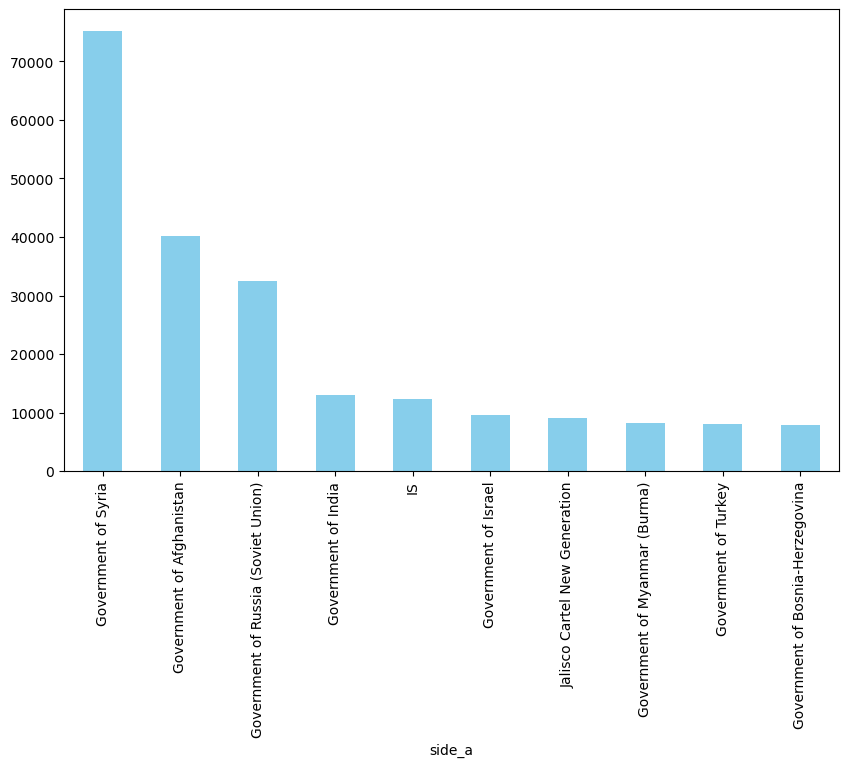

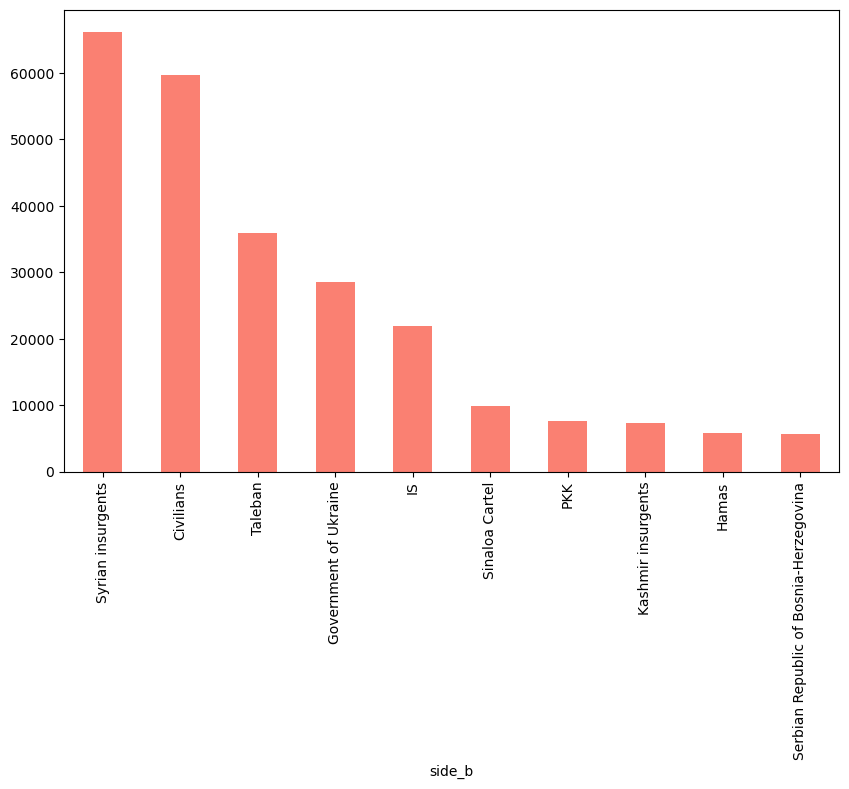

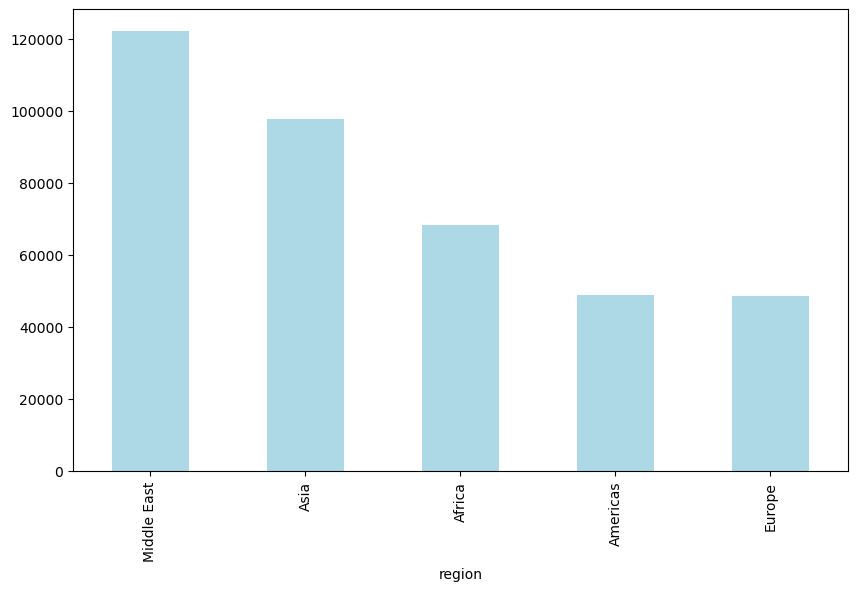

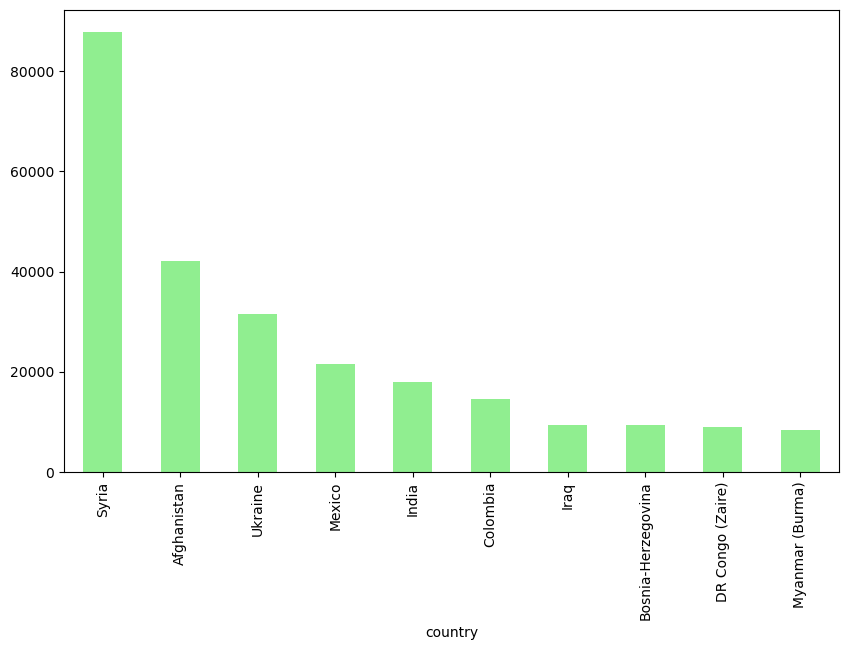

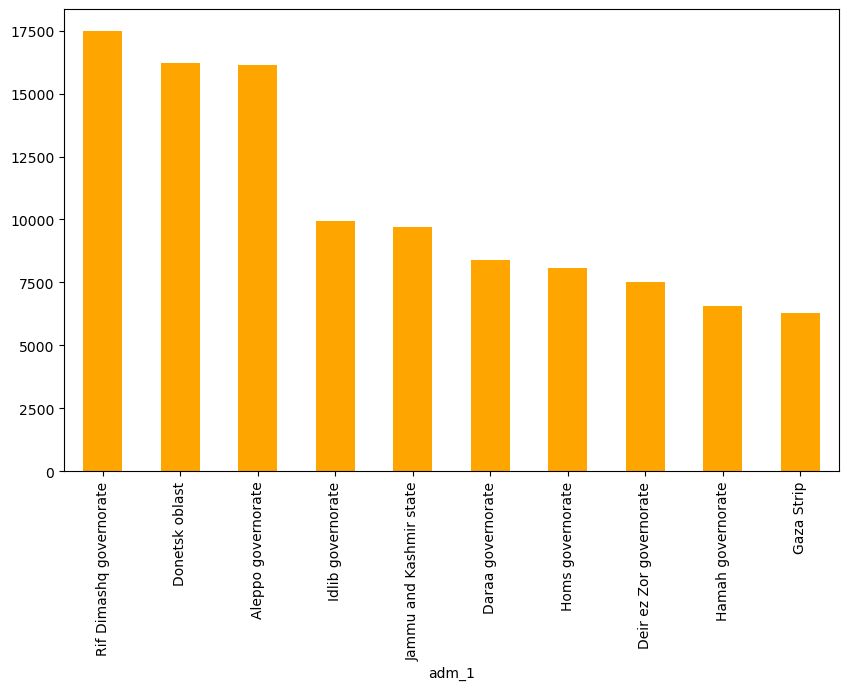

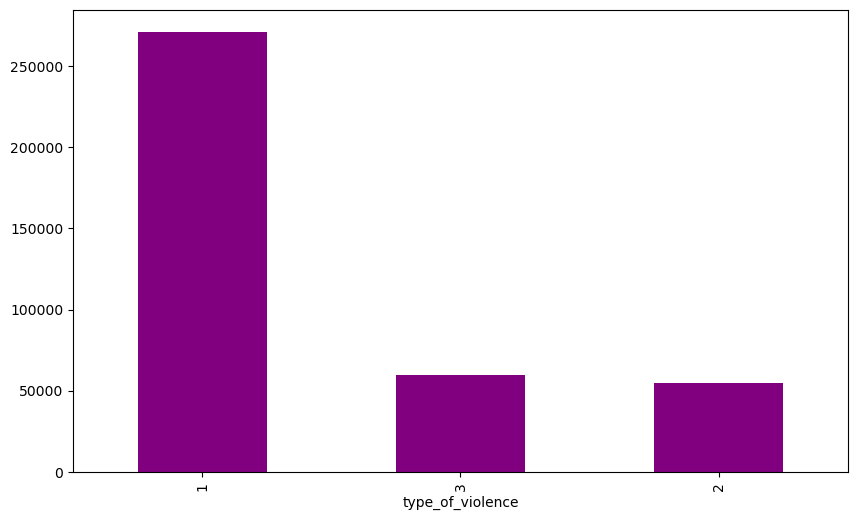

1:conflicto estatal - 2:conflicto no estatal - 3:violencia unilateral


In [97]:
top_10a = GEDEvent['side_a'].value_counts().head(10)
top_10a.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.show()

top_10b = GEDEvent['side_b'].value_counts().head(10)
top_10b.plot(kind='bar', figsize=(10, 6), color='salmon')

plt.show()

top_10a = GEDEvent['region'].value_counts().head(10)
top_10a.plot(kind='bar', figsize=(10, 6), color='lightblue')

plt.show()

top_10b = GEDEvent['country'].value_counts().head(10)
top_10b.plot(kind='bar', figsize=(10, 6), color='lightgreen')

plt.show()

top_10a = GEDEvent['adm_1'].value_counts().head(10)
top_10a.plot(kind='bar', figsize=(10, 6), color='orange')

plt.show()

top_10b = GEDEvent['type_of_violence'].value_counts().head(10)
top_10b.plot(kind='bar', figsize=(10, 6), color='purple')

plt.show()
print('1:conflicto estatal - 2:conflicto no estatal - 3:violencia unilateral')

## Entropía de Shannon

In [98]:
for col in GEDEvent.select_dtypes(include=['object', 'category']):
    p = GEDEvent[col].value_counts(normalize=True)
    entropia = -np.sum(p * np.log2(p))
    print(f"Entropía de Shannon de '{col}': {entropia:.4f}")

Entropía de Shannon de 'region': 2.2236
Entropía de Shannon de 'country': 4.6054
Entropía de Shannon de 'adm_1': 7.8114
Entropía de Shannon de 'type_of_violence': 1.1741
Entropía de Shannon de 'side_a': 5.6566
Entropía de Shannon de 'side_b': 5.3389


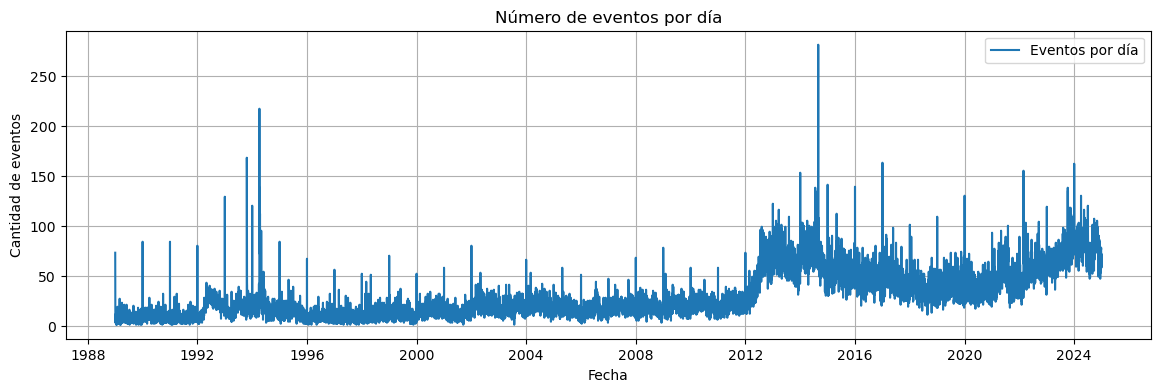

In [99]:

# Agrupar eventos por día y contar
eventos_por_dia = GEDEvent['date_start'].dt.date.value_counts().sort_index()

# Crear un DataFrame con las fechas y los conteos
df_eventos = pd.DataFrame({
    "fecha": eventos_por_dia.index,
    "cantidad_eventos": eventos_por_dia.values
})

# Graficar 
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_eventos, x="fecha", y="cantidad_eventos", label="Eventos por día")

# Títulos y etiquetas
plt.title("Número de eventos por día")
plt.xlabel("Fecha")
#plt.yscale('log')
plt.ylabel("Cantidad de eventos")
plt.grid(True)
plt.show()



In [100]:
# Análisis descriptivo de la variable 'best' por región
print("Análisis descriptivo de la variable 'best' por región")
regiones = GEDEvent['region'].unique()
print("-" * 60)

for region in regiones:
    print(f"\nRegión: {region}")
    print("-" * (len(region) + 8))


    region_best = GEDEvent[GEDEvent['region'] == region]['best']
    print(f"  Suma Total: {region_best.count()}")
    print(f"  Media: {region_best.mean():.2f}")
    print(f"  Mediana: {region_best.median():.2f}")
    print(f"  Moda: {region_best.mode().tolist()}")
    print(f"  Desviación Estándar: {region_best.std():.2f}")
    print(f"  Varianza: {region_best.var():.2f}")
    print(f"  Mínimo: {region_best.min()}")
    print(f"  Cuartil 1: {region_best.quantile(0.25):.2f}")
    print(f"  Cuartil 3: {region_best.quantile(0.75):.2f}")
    print(f"  Máximo: {region_best.max()}")
    print(f"  Rango Intercuartil: {(region_best.quantile(0.75)-region_best.quantile(0.25)):.2f}")
    print(f"  Asimetría: {region_best.skew():.2f}")
    print(f"  Curtosis: {region_best.kurtosis():.2f}")
    print("-" * (len(region) + 8))



Análisis descriptivo de la variable 'best' por región
------------------------------------------------------------

Región: Asia
------------
  Suma Total: 97879
  Media: 6.05
  Mediana: 2.00
  Moda: [1]
  Desviación Estándar: 32.28
  Varianza: 1042.15
  Mínimo: 0
  Cuartil 1: 1.00
  Cuartil 3: 5.00
  Máximo: 2821
  Rango Intercuartil: 4.00
  Asimetría: 45.05
  Curtosis: 2736.50
------------

Región: Europe
--------------
  Suma Total: 48586
  Media: 7.68
  Mediana: 2.00
  Moda: [1]
  Desviación Estándar: 121.29
  Varianza: 14710.91
  Mínimo: 0
  Cuartil 1: 1.00
  Cuartil 3: 3.00
  Máximo: 15996
  Rango Intercuartil: 2.00
  Asimetría: 76.93
  Curtosis: 7965.33
--------------

Región: Africa
--------------
  Suma Total: 68354
  Media: 29.79
  Mediana: 2.00
  Moda: [1]
  Desviación Estándar: 808.10
  Varianza: 653025.02
  Mínimo: 0
  Cuartil 1: 1.00
  Cuartil 3: 7.00
  Máximo: 121848
  Rango Intercuartil: 6.00
  Asimetría: 104.19
  Curtosis: 13826.62
--------------

Región: Americas
----

/tmp/ipykernel_842192/408585979.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  muertes_mensuales_por_region = GEDEvent.groupby('region').resample('M', on='date_start')['best'].sum().reset_index()
/tmp/ipykernel_842192/408585979.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  muertes_mensuales_por_region = GEDEvent.groupby('region').resample('M', on='date_start')['best'].sum().reset_index()
/tmp/ipykernel_842192/408585979.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  muertes_mensuales_por_region['smoothed_best'] = muertes_mensuales_por_regio

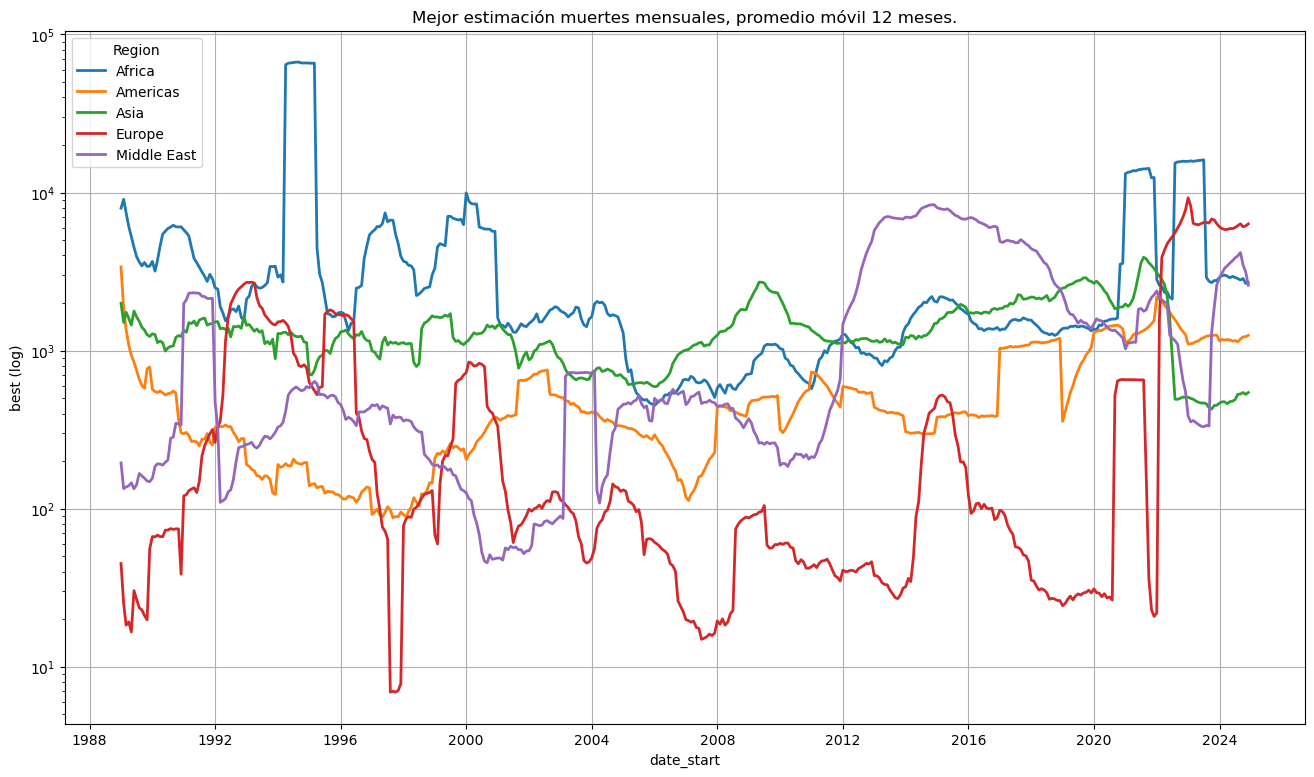

In [101]:
# Calcular muertes mensuales por región
# Agrupar por región y resamplear por mes, sumando las muertes
muertes_mensuales_por_region = GEDEvent.groupby('region').resample('M', on='date_start')['best'].sum().reset_index()
muertes_mensuales_por_region['date_start'] = muertes_mensuales_por_region['date_start'].dt.to_period('M').dt.to_timestamp()

# Promedio móvil 12 meses
muertes_mensuales_por_region['smoothed_best'] = muertes_mensuales_por_region.groupby('region')['best'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

plt.figure(figsize=(16, 9)) 
sns.lineplot(data=muertes_mensuales_por_region, x='date_start', y='smoothed_best', hue='region', linewidth=2)


plt.title('Mejor estimación muertes mensuales, promedio móvil 12 meses.')
plt.ylabel('best (log)')
plt.yscale('log')
plt.legend(title='Region')
plt.grid(True)
plt.show()

## Datos faltantes
Todos son adm_1 o "provincia" y la mayoría son de Europa. Todos tienen coordenadas geográficas, así que el dato, de existir, es recuperable.

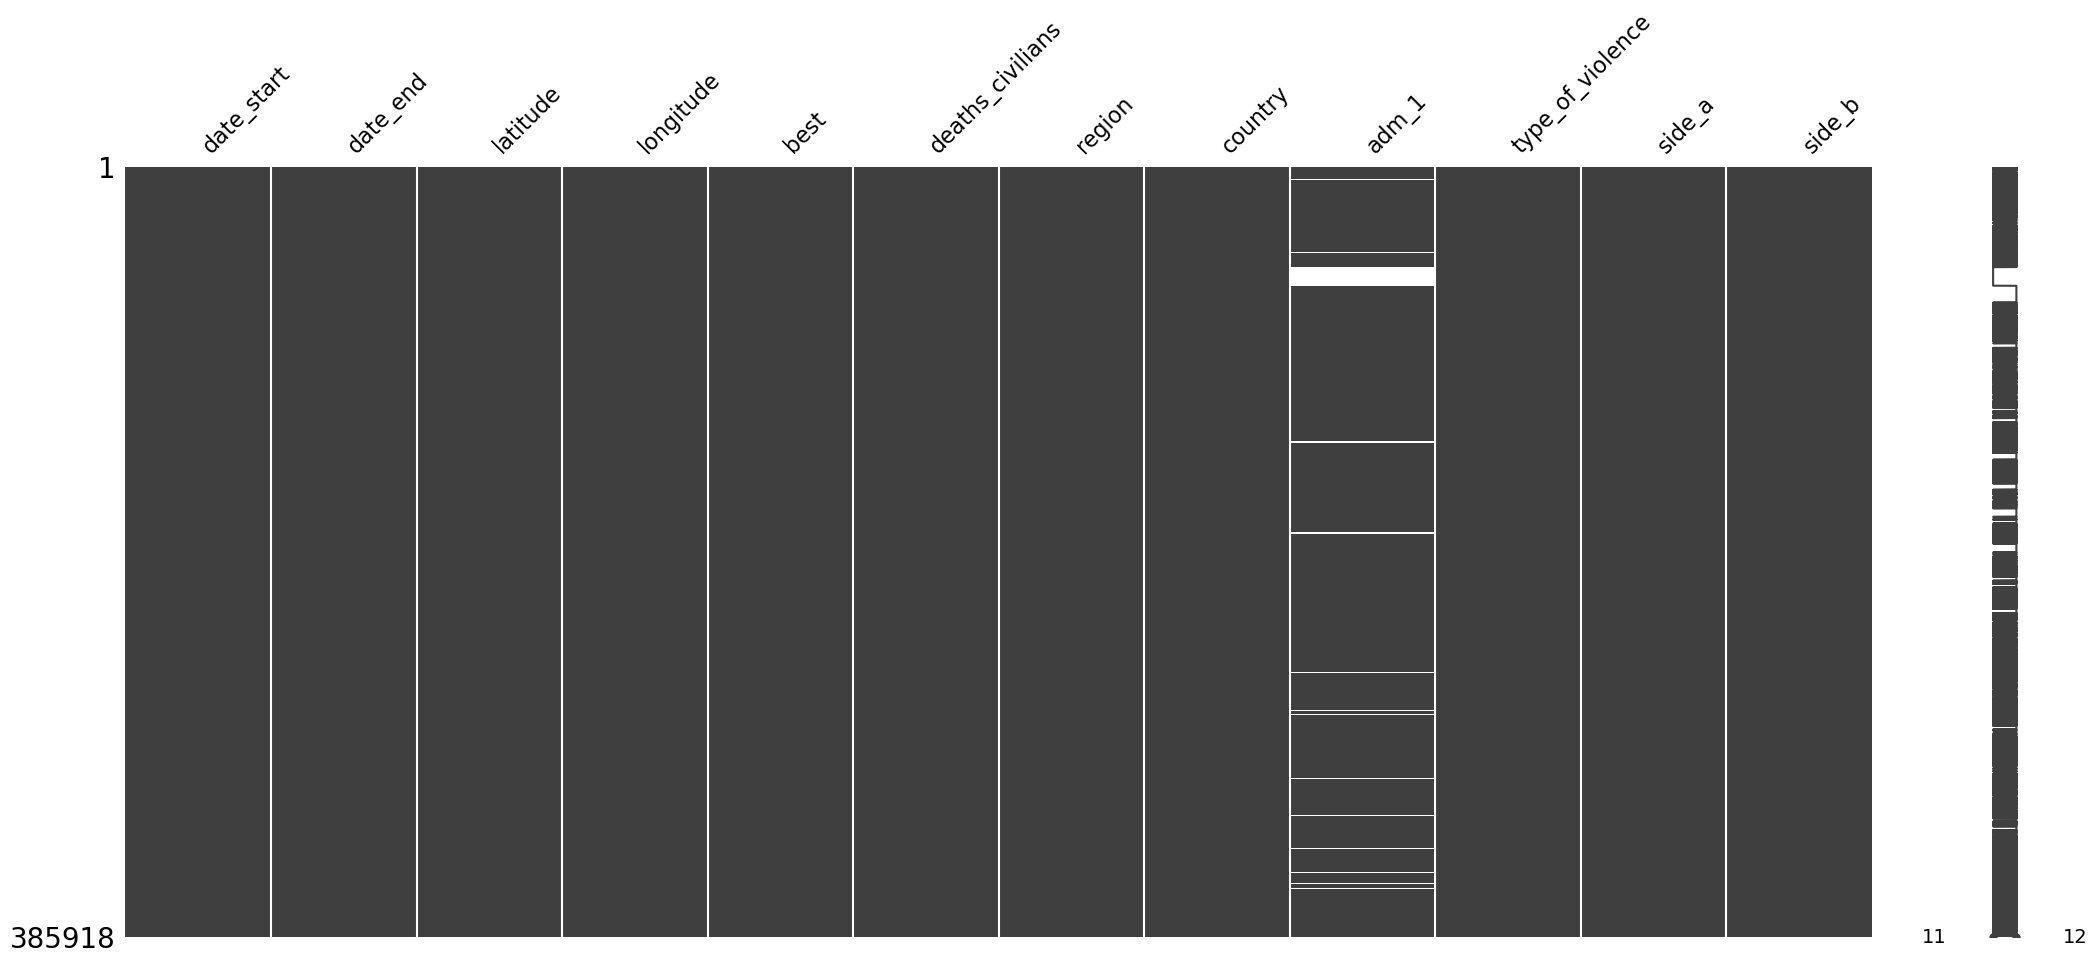

adm_1        False  True 
region                   
Africa       97.61   2.39
Americas     98.48   1.52
Asia         98.13   1.87
Europe       75.24  24.76
Middle East  97.29   2.71


In [102]:

msno.matrix(GEDEvent)
plt.show()


tabla_cruzada = pd.crosstab(GEDEvent['region'], GEDEvent['adm_1'].isna(), normalize='index') * 100
print(tabla_cruzada.round(2))




In [103]:
# Paso 1: Expandir eventos a muertes mensuales

filas = []
for _, evento in GEDEvent.iterrows():
    duracion = pd.date_range(evento['date_start'], evento['date_end'], freq='MS')
    if len(duracion) == 0:
        duracion = pd.date_range(evento['date_start'], periods=1, freq='MS')
    muertes_mensuales = evento['best'] / len(duracion)
    for d in duracion:
        filas.append({
            'año': d.year,
            'mes': d.month,
            'latitud': evento['latitude'],
            'longitud': evento['longitude'],
            'muertes': muertes_mensuales
        })

df = pd.DataFrame(filas)

In [104]:
# Paso 2: Calcular índices de la cuadrícula 100x200
filas_cuadricula, columnas_cuadricula = 100, 200
df['fila'] = np.floor((-df['latitud'] + 90) / 1.8).astype(int)
df['columna'] = np.floor((df['longitud'] + 180) / 1.8).astype(int)
df['fila'] = df['fila'].clip(0, filas_cuadricula - 1)
df['columna'] = df['columna'].clip(0, columnas_cuadricula - 1)

In [105]:
# Paso 3: Fechas únicas ordenadas
fechas = df[['año', 'mes']].drop_duplicates().sort_values(by=['año', 'mes']).to_records(index=False)

In [106]:
# Paso 4: Crear grillas por mes (muertes acumuladas)
grillas_muertes = []
for año, mes in fechas:
    datos_mes = df[(df['año'] == año) & (df['mes'] == mes)]
    cuadricula = np.zeros((filas_cuadricula, columnas_cuadricula))
    grupo = datos_mes.groupby(['fila', 'columna'])['muertes'].sum()
    for (f, c), valor in grupo.items():
        cuadricula[int(f), int(c)] = valor
    grillas_muertes.append(cuadricula)



In [107]:
# Paso 5: Clasificar las celdas en 4 niveles
def asignar_bin(cuadricula):
    niveles = np.full_like(cuadricula, 0)
    niveles[(cuadricula > 0) & (cuadricula <= 5)] = 1    # Bajo
    niveles[(cuadricula > 5) & (cuadricula <= 100)] = 2  # Medio
    niveles[cuadricula > 100] = 3                        # Alto
    return niveles

grillas_clasificadas = [asignar_bin(c) for c in grillas_muertes]

In [108]:
# Paso 6: Configurar animación
etiquetas = ['Seguro', 'Bajo', 'Medio', 'Alto']
colores = ['white', 'yellow', 'orange', 'red']
cmapa = plt.matplotlib.colors.ListedColormap(colores)
imagen_mapa = mpimg.imread('img/World_location_map_(equirectangular_180)2.png')
fig, ax = plt.subplots(figsize=(12, 6))

def actualizar(frame):
    ax.clear()
    cuadricula = grillas_clasificadas[frame]
    año, mes = fechas[frame]
    ax.imshow(imagen_mapa, extent=[0, columnas_cuadricula, filas_cuadricula, 0])
    ax.imshow(cuadricula, cmap=cmapa, vmin=0, vmax=3, alpha=0.6)

    ax.set_title(f"Muertes por conflicto armado: {año}-{mes:02d}")
    ax.axis('off')



    
plt.close(fig)

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

matplotlib.rcParams['animation.embed_limit'] = 200 * 1024 * 1024

# Paso 7: Animar
ani = FuncAnimation(fig, actualizar, frames=len(fechas), interval=150)
HTML(ani.to_jshtml())


# ____________________________________________________________________________________________________ #
# ____________________________________________________________________________________________________ #

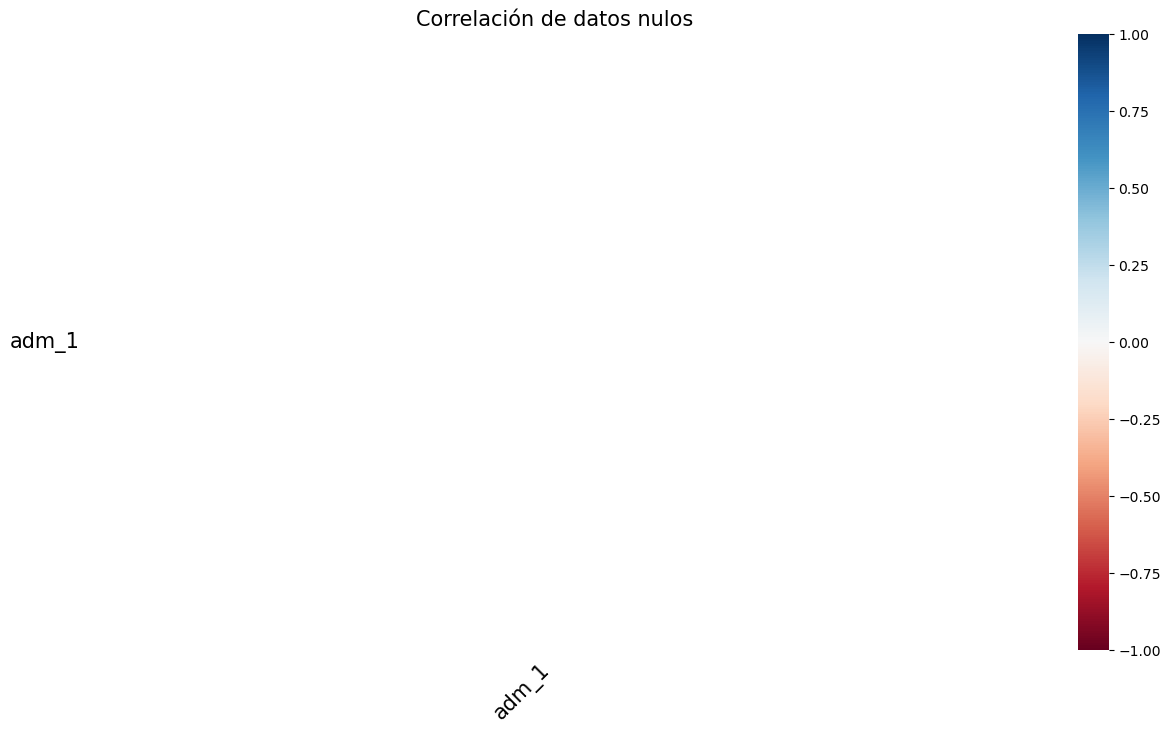

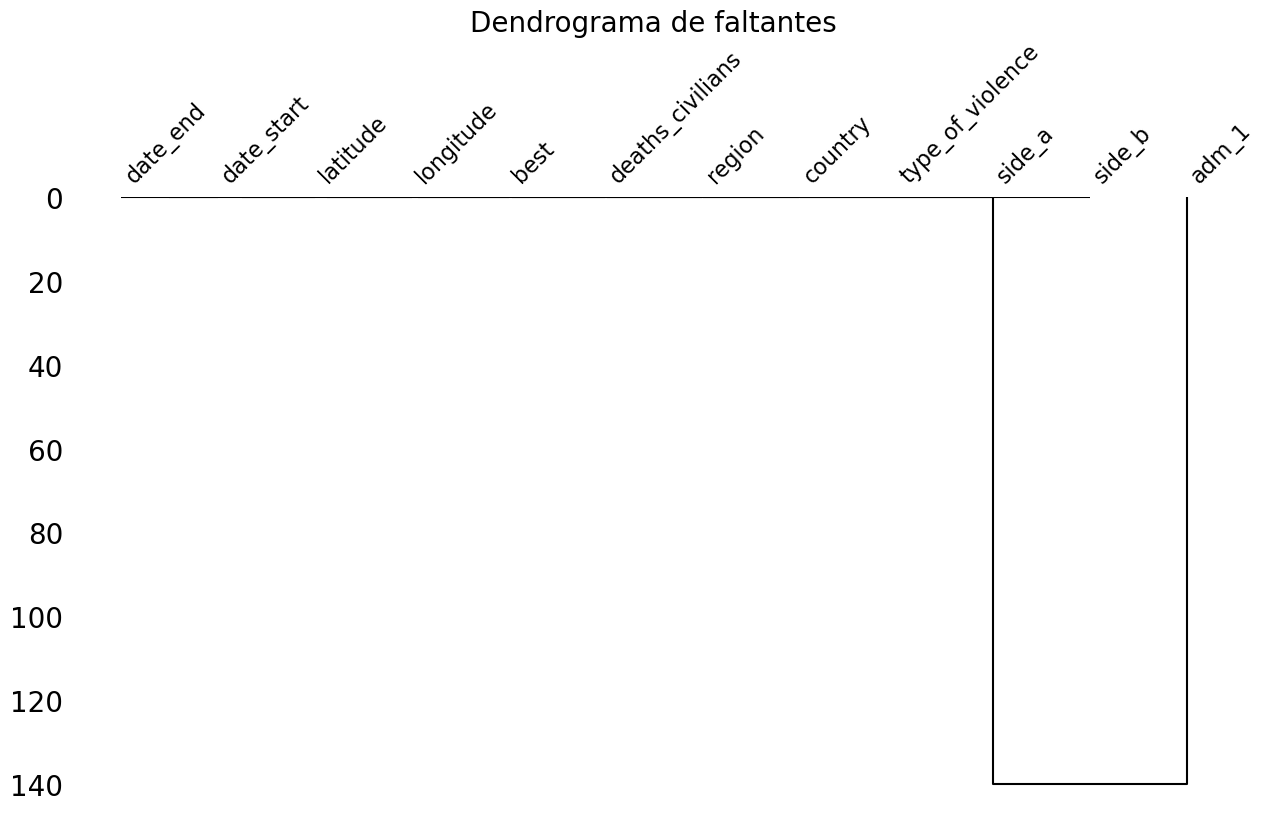

In [110]:

msno.heatmap(GEDEvent, fontsize=15, figsize=(15,8))
plt.title("Correlación de datos nulos", fontsize=15)
plt.show()

msno.dendrogram(GEDEvent, figsize=(15,8))
plt.title('Dendrograma de faltantes', fontsize=20)
plt.show()

In [111]:
pd.set_option('display.max_rows', 200)

tabla_cruzada = pd.crosstab(GEDEvent['country'], GEDEvent['adm_1'].isna(), normalize='index') * 100
print(tabla_cruzada.round(2))

tabla_cruzada = pd.crosstab(GEDEvent['country'], GEDEvent['adm_1'].isna())
print(tabla_cruzada.round(2))

pd.reset_option('display.max_rows')

adm_1                             False   True 
country                                        
Afghanistan                       98.29    1.71
Albania                          100.00    0.00
Algeria                           93.66    6.34
Angola                            95.07    4.93
Argentina                        100.00    0.00
Armenia                           92.21    7.79
Australia                        100.00    0.00
Austria                          100.00    0.00
Azerbaijan                        51.00   49.00
Bahrain                           79.17   20.83
Bangladesh                        96.25    3.75
Belgium                          100.00    0.00
Benin                            100.00    0.00
Bhutan                           100.00    0.00
Bolivia                           66.67   33.33
Bosnia-Herzegovina                 0.00  100.00
Botswana                         100.00    0.00
Brazil                           100.00    0.00
Burkina Faso                      99.01 

Faltaba decir que los datos que faltan son MAR, la gran mayoría, porque el hecho que no estén se correlaciona con 'country' el país del evento. En particular sólo Bosnia-Herzegovina aporta 9.340 (48%) de los 19.547 eventos sin 'adm_1' o provincia registrada.

In [112]:
# Seleccionar variables numéricas relevantes
dfqt = GEDEvent[['best']]
dfqt

best
0          6
1        183
2          2
3         10
4          6
...      ...
385913     9
385914     9
385915     7
385916     1
385917     6

[385918 rows x 1 columns]

In [115]:

# Métodos estadísticos para detectar outliers
Q1 = dfqt.quantile(0.25)
Q3 = dfqt.quantile(0.75)

IQR = Q3 - Q1
outliers_iqr = (dfqt < (Q1 - 1.5 * IQR)) | (dfqt > (Q3 + 1.5 * IQR))
print(f"Outliers\nBest: <{Q1['best'] - 1.5 * IQR['best']:.02f} o >{Q3['best'] + 1.5 * IQR['best']:.02f}")

Outliers
Best: <-3.50 o >8.50


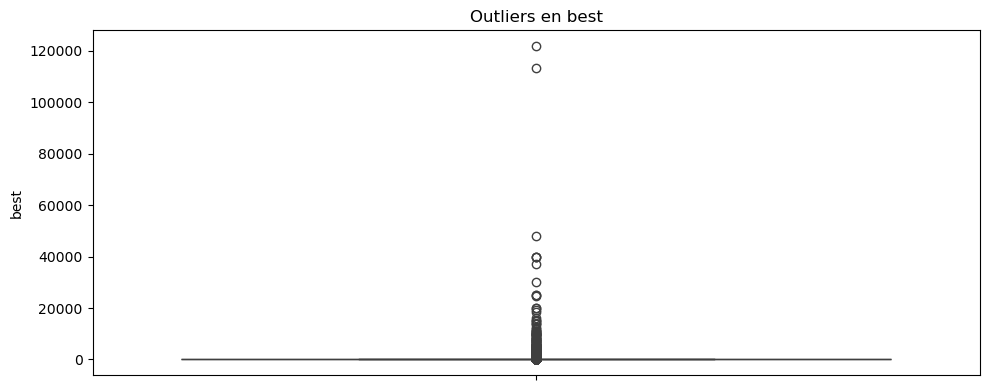

In [121]:
# Visualización de outliers con boxplots
fig, axes = plt.subplots(1, 1, figsize=(10, 4))

# Boxplot para 'best'
sns.boxplot(y=dfqt['best'], ax=axes)
axes.set_title('Outliers en best')

plt.tight_layout()
plt.show()

In [123]:
# Método basado en desviación estándar
mean = dfqt.mean()
#std = dfqt.std()
std = dfqt.apply(lambda x: np.nanstd(x, ddof=1))

outliers_std = (dfqt < (mean - 3 * std)) | (dfqt > (mean + 3 * std))

print(f"Outliers\best: <{mean['best'] - 3 * std['best']:.02f} o >{mean['best'] + 3 * std['best']:.02f}")

Outlierest: <-1032.79 o >1053.30


In [ ]:
# Seleccionar variables numéricas relevantes por país
dfqt = GEDEvent[['best', 'country']]
dfqt

best              country
0          6          Afghanistan
1        183          Afghanistan
2          2          Afghanistan
3         10          Afghanistan
4          6          Afghanistan
...      ...                  ...
385913     9  Zimbabwe (Rhodesia)
385914     9  Zimbabwe (Rhodesia)
385915     7  Zimbabwe (Rhodesia)
385916     1  Zimbabwe (Rhodesia)
385917     6  Zimbabwe (Rhodesia)

[385918 rows x 2 columns]

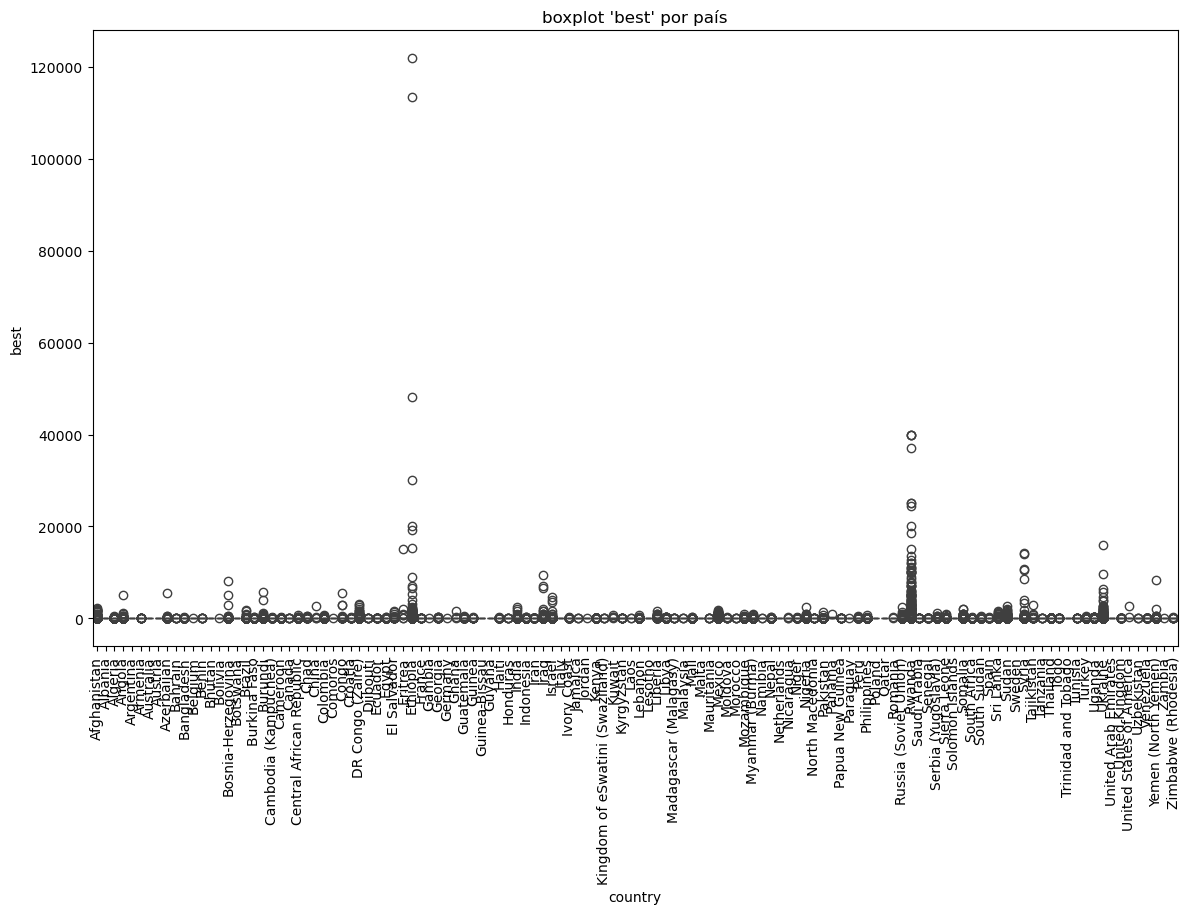

In [163]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="country", y="best", data=dfqt)
plt.xticks(rotation=90)
plt.title("boxplot 'best' por país")
plt.show()


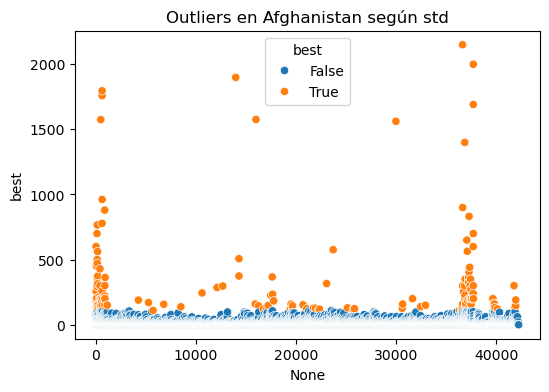

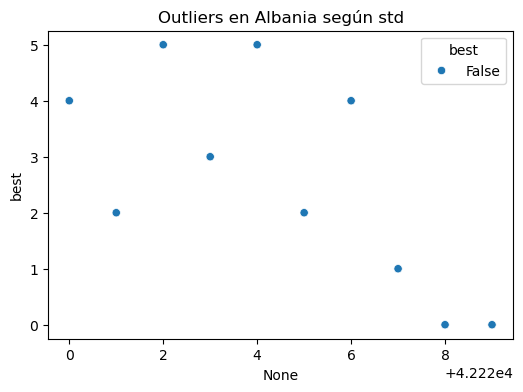

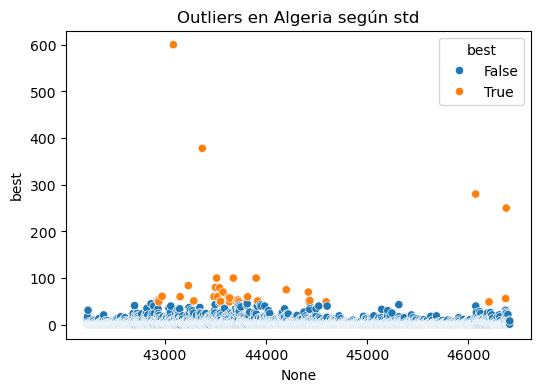

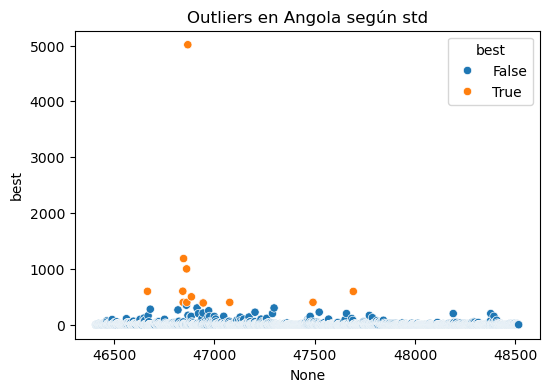

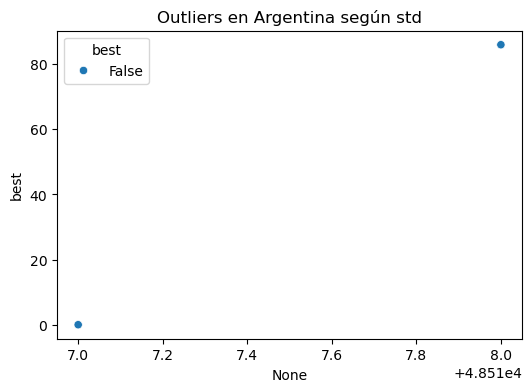

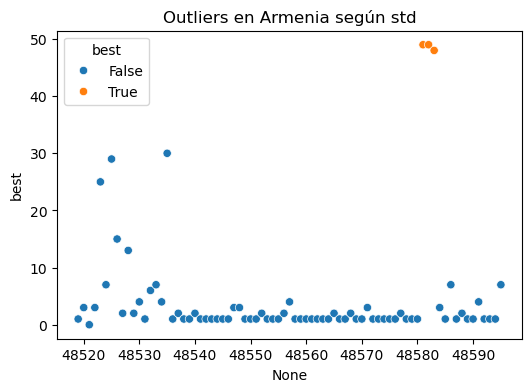

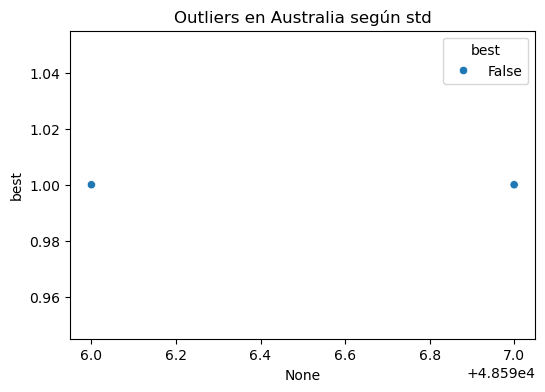

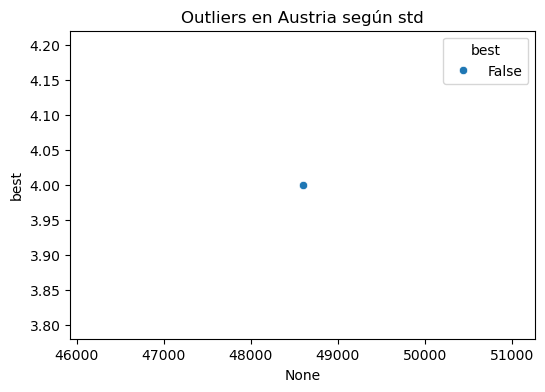

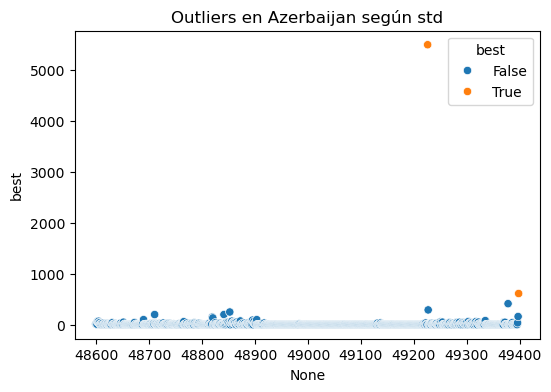

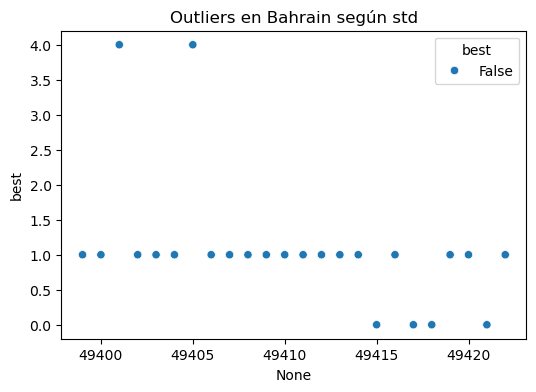

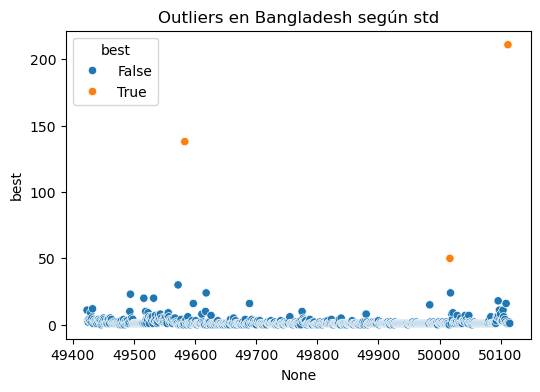

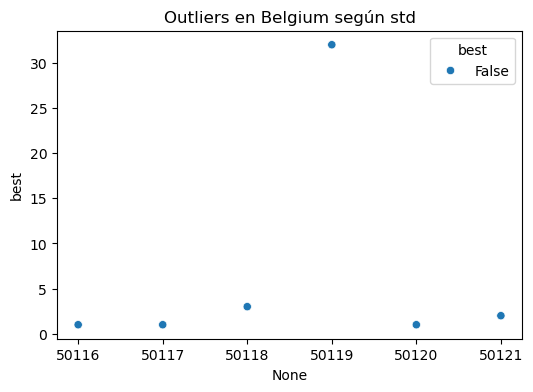

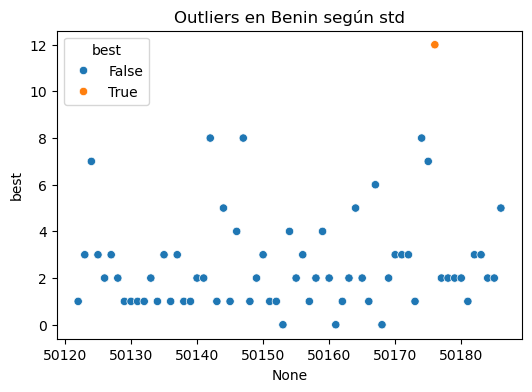

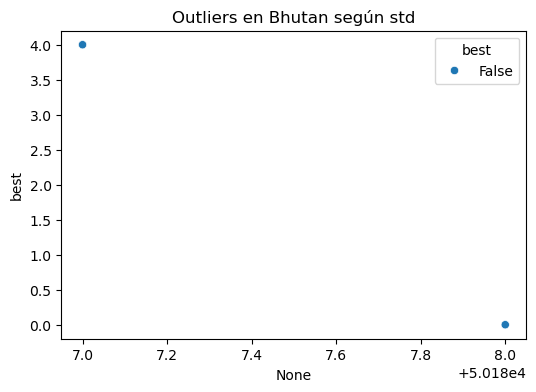

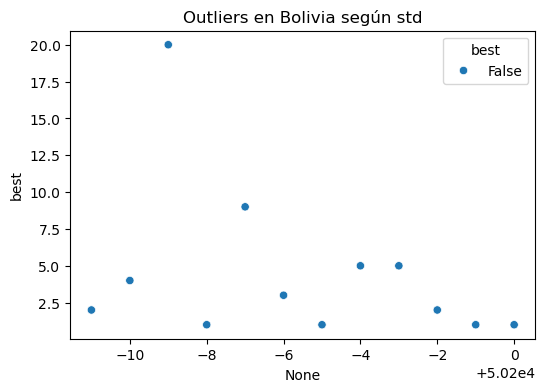

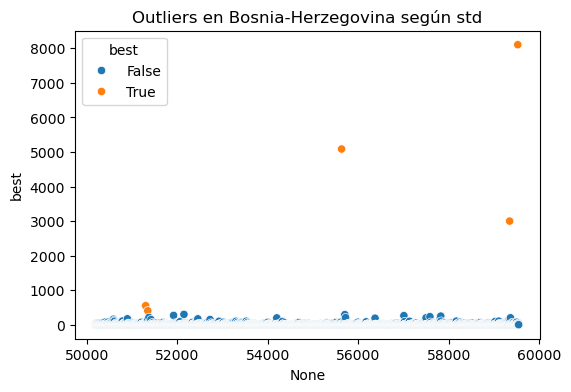

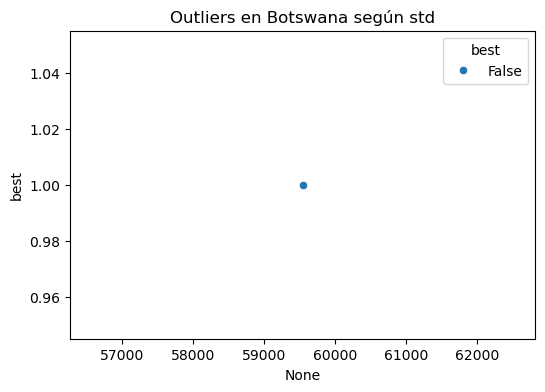

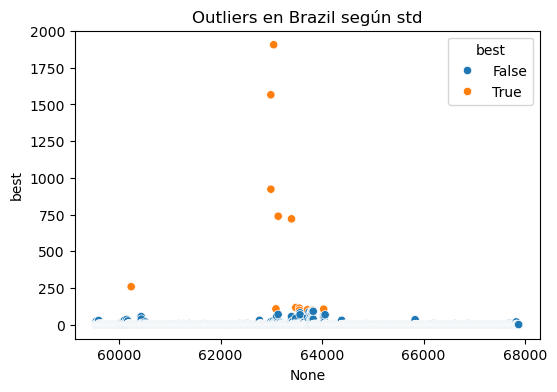

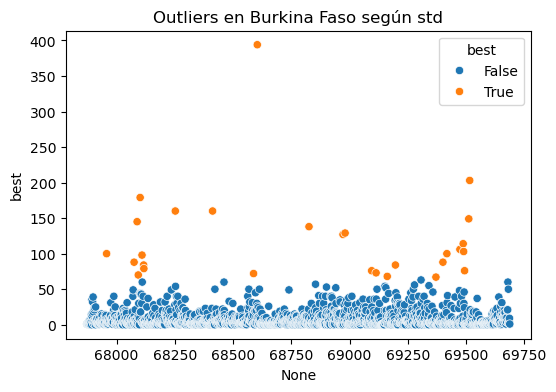

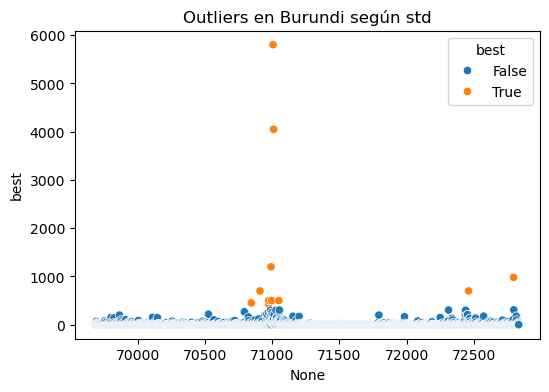

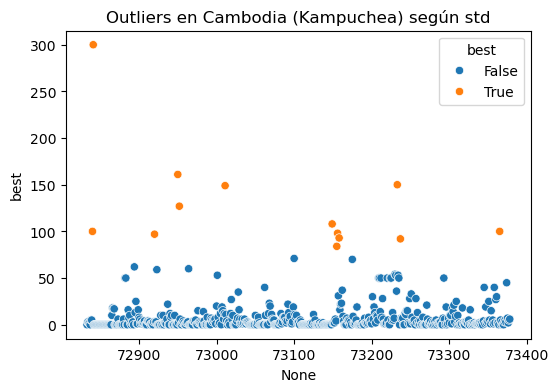

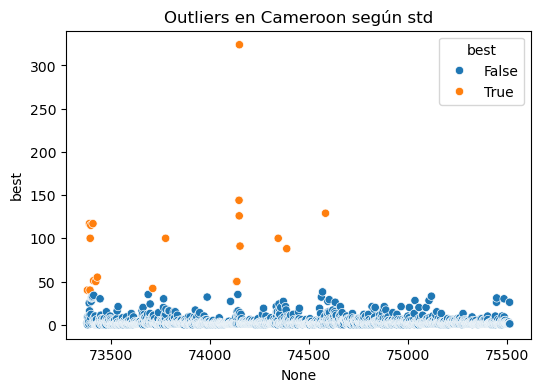

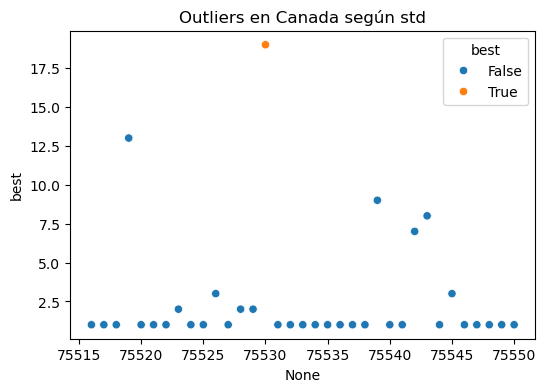

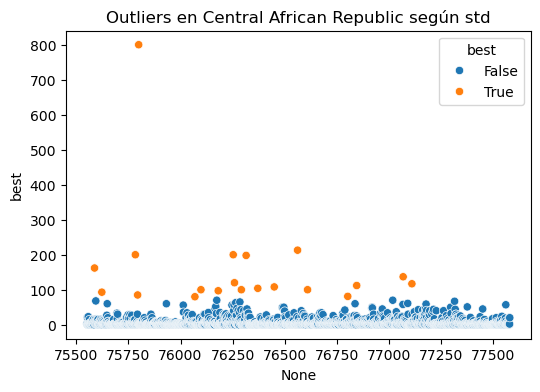

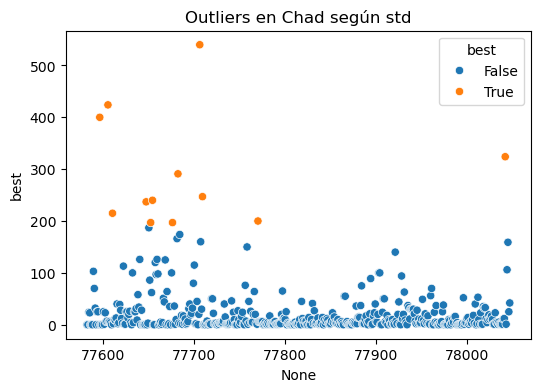

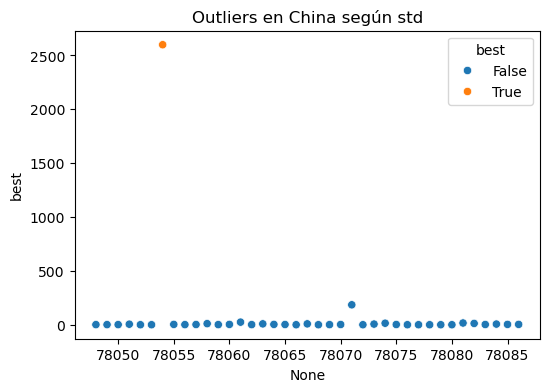

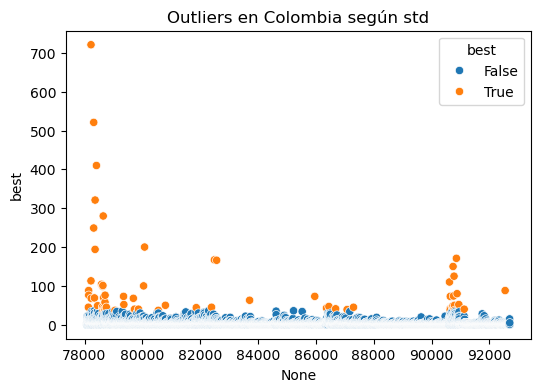

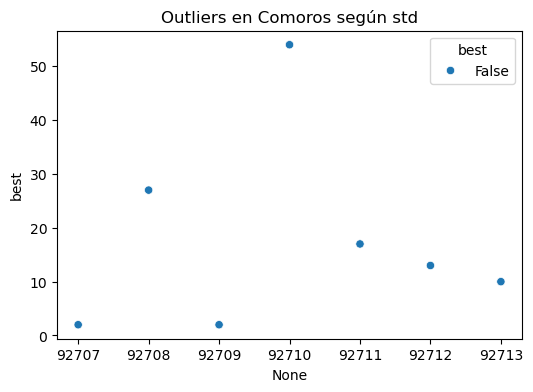

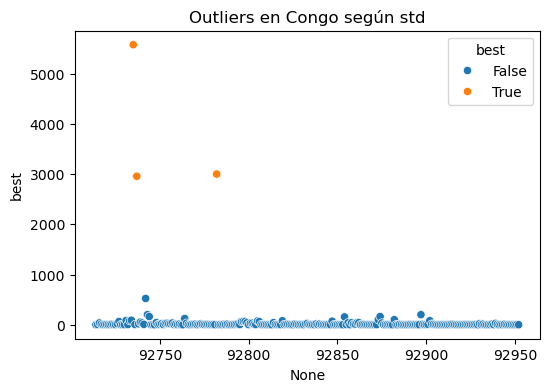

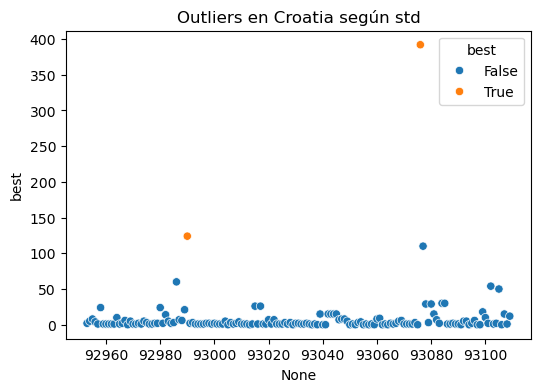

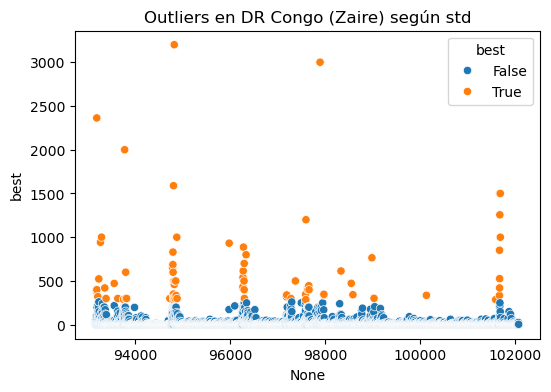

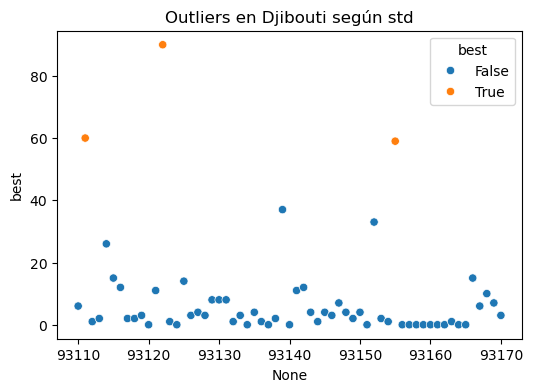

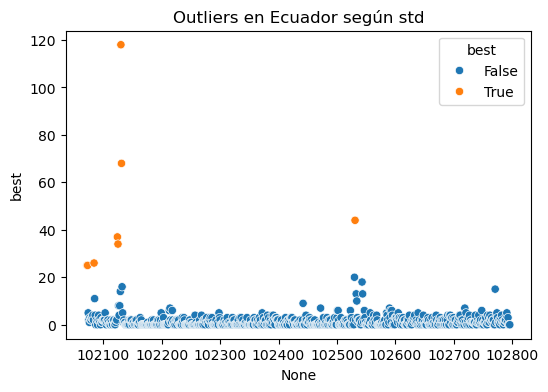

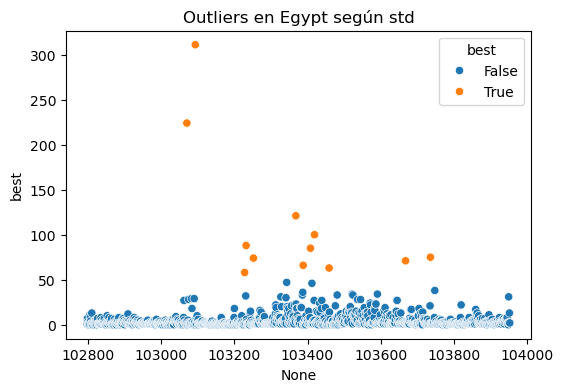

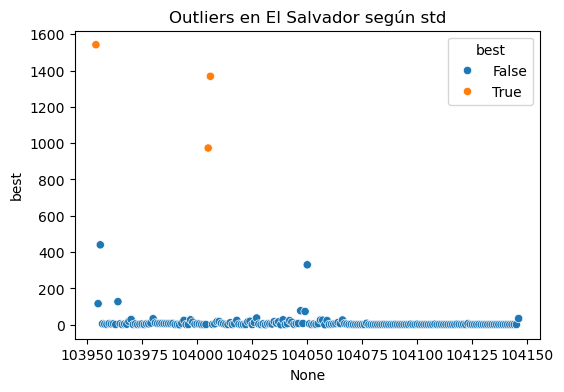

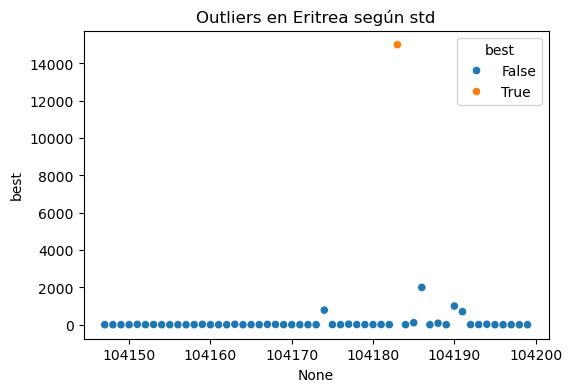

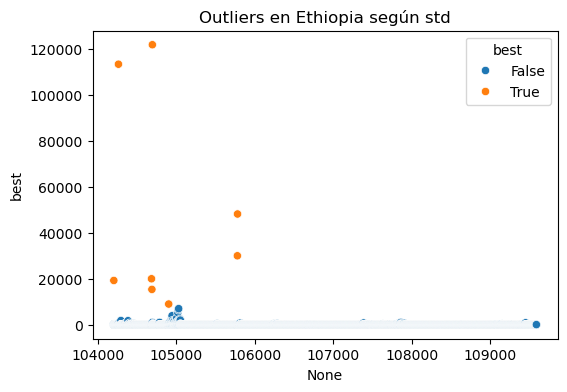

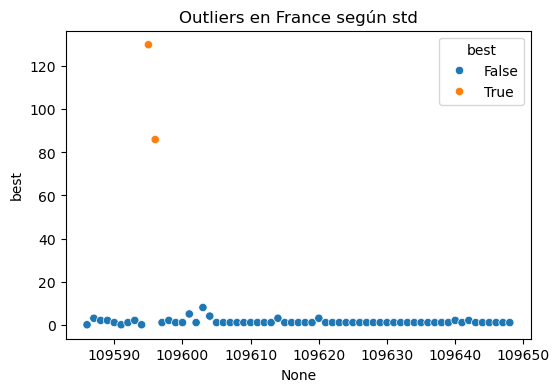

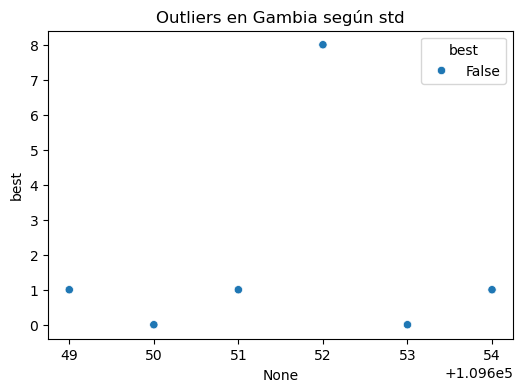

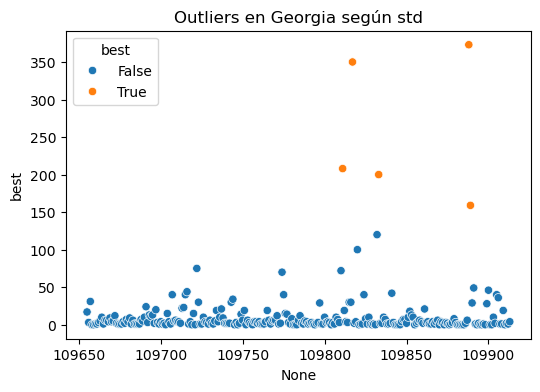

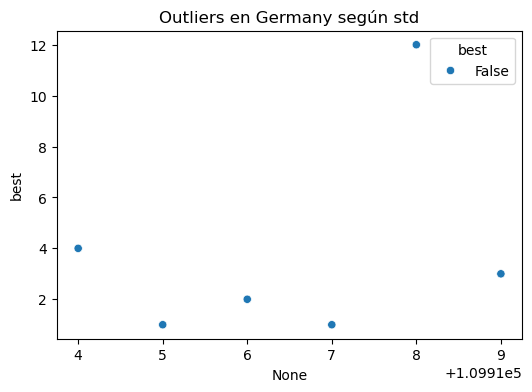

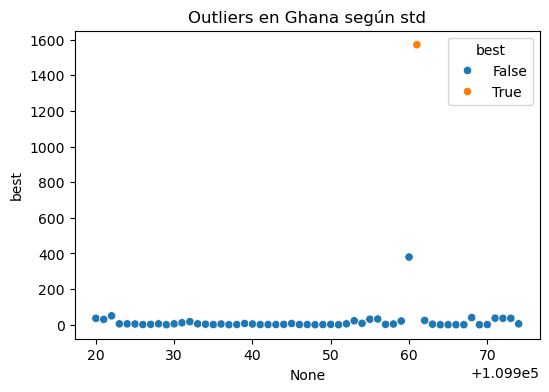

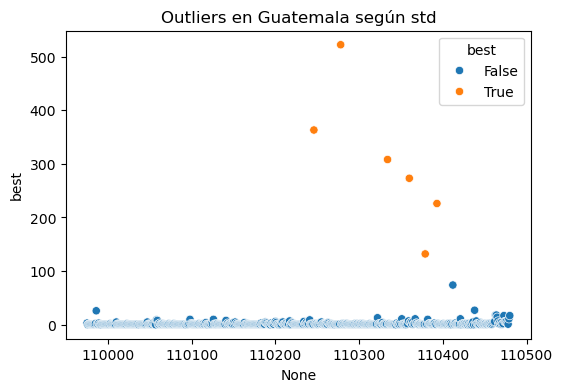

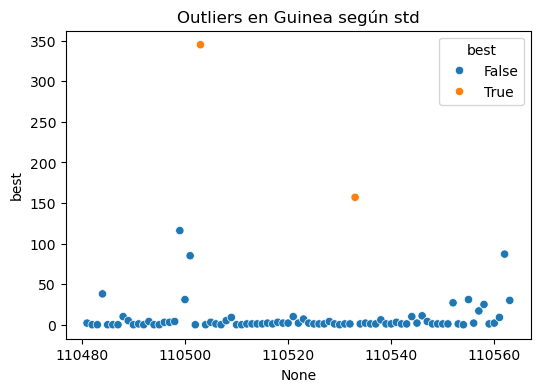

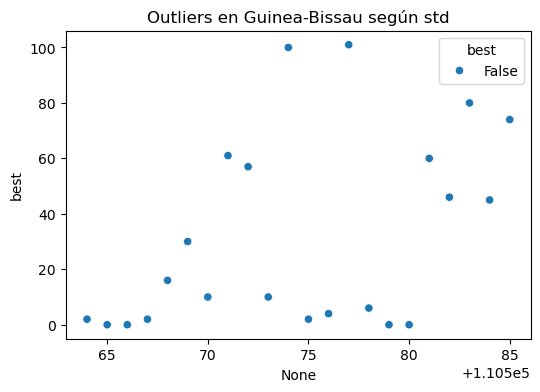

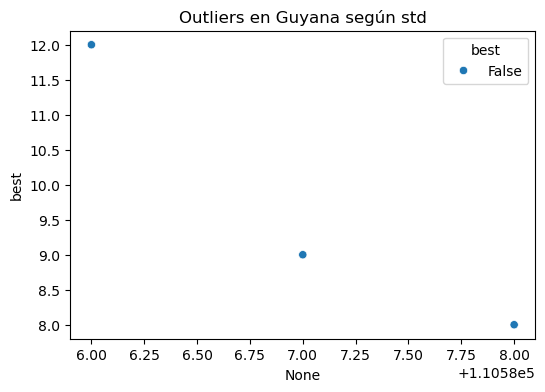

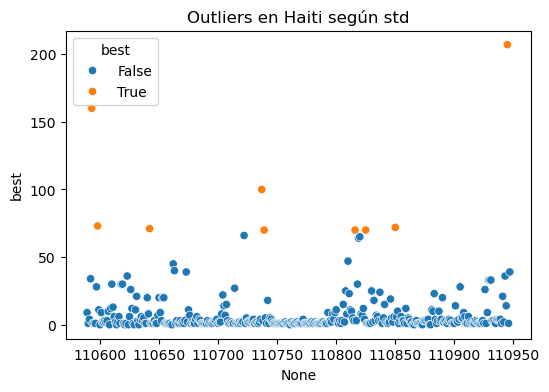

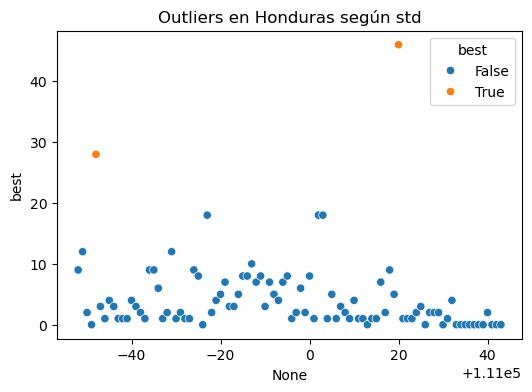

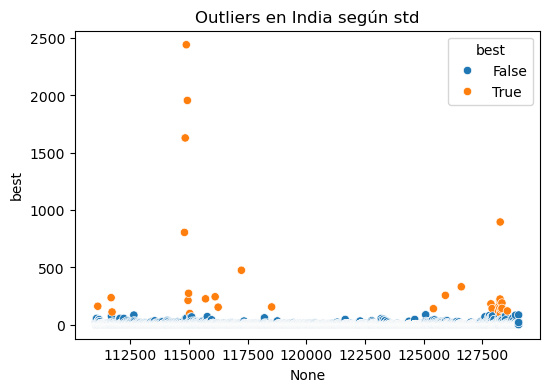

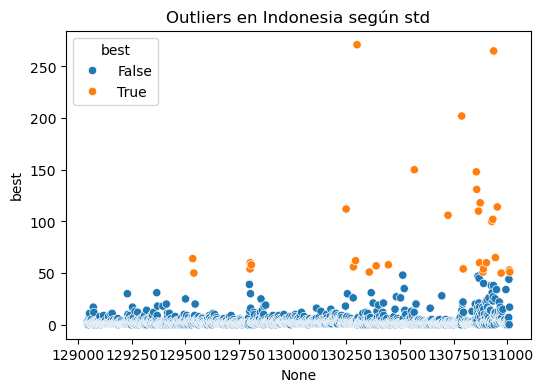

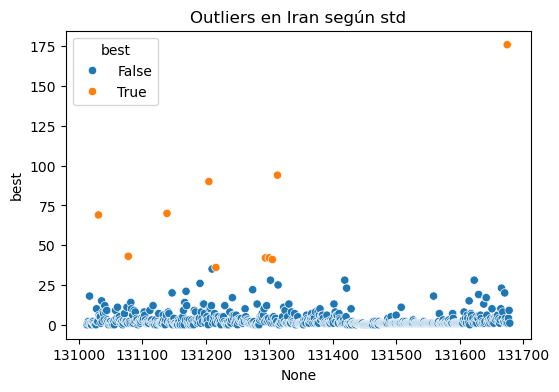

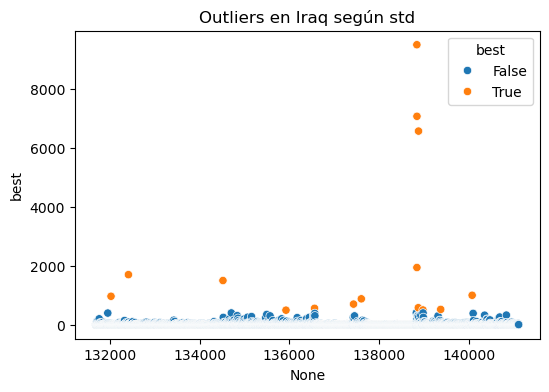

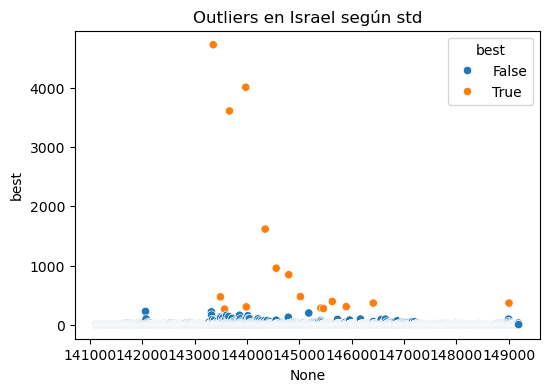

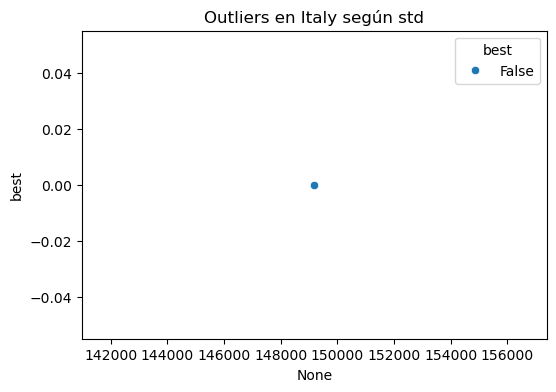

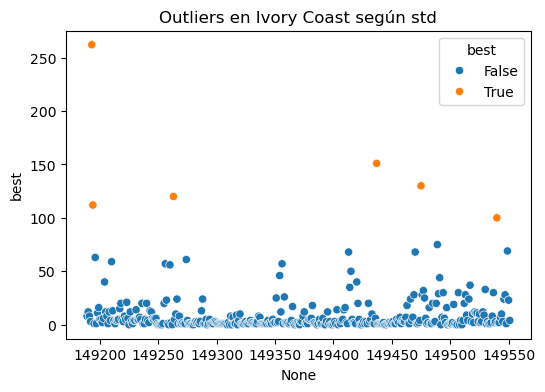

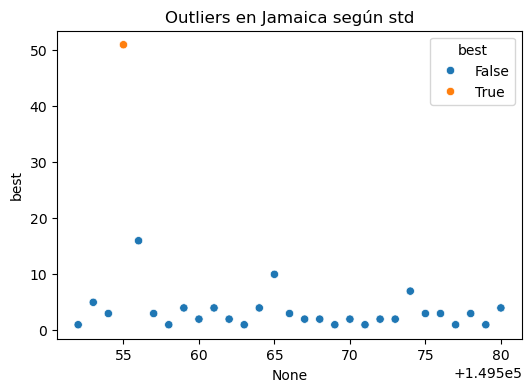

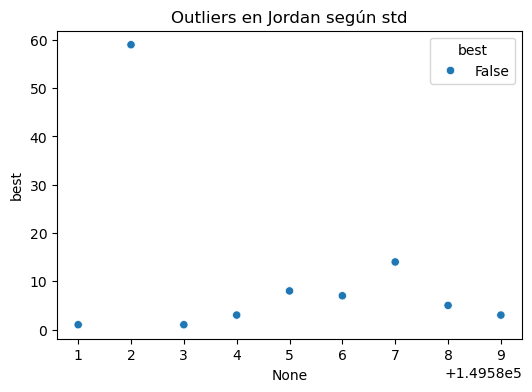

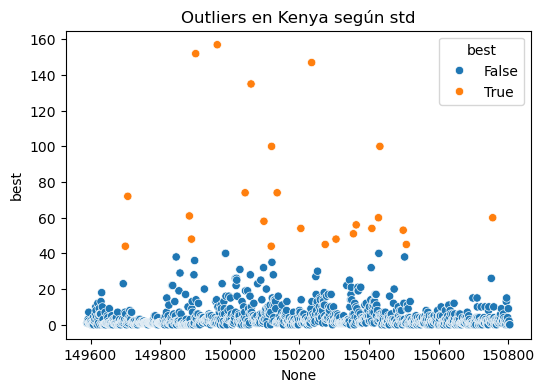

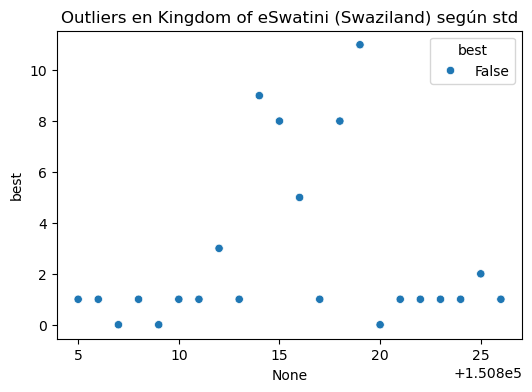

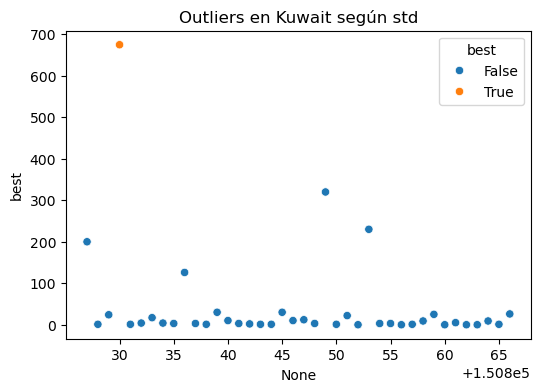

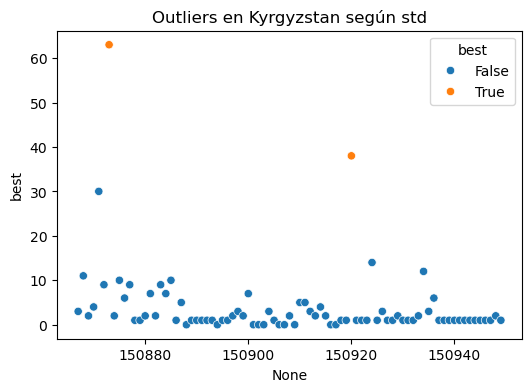

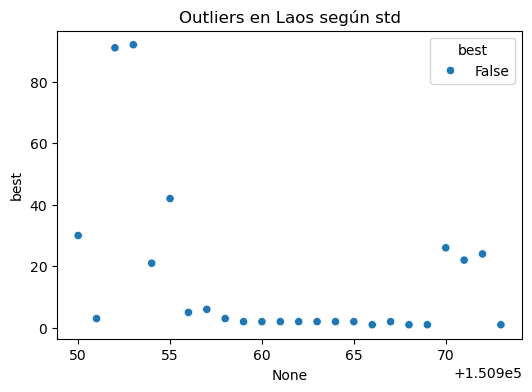

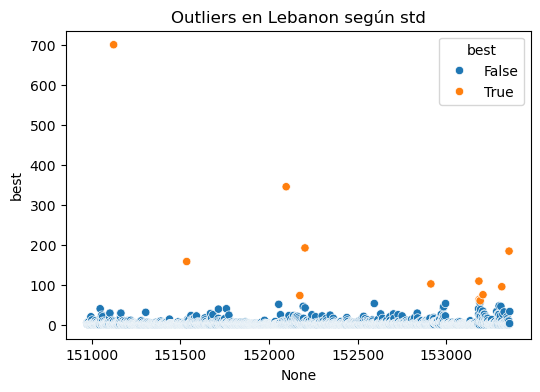

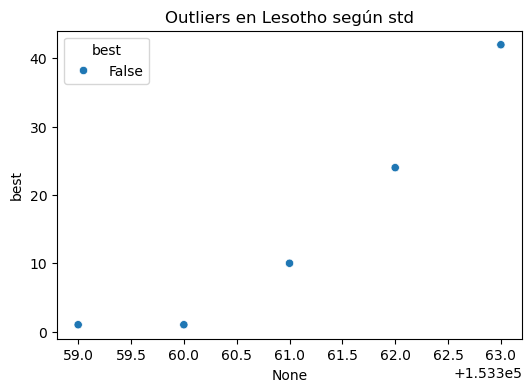

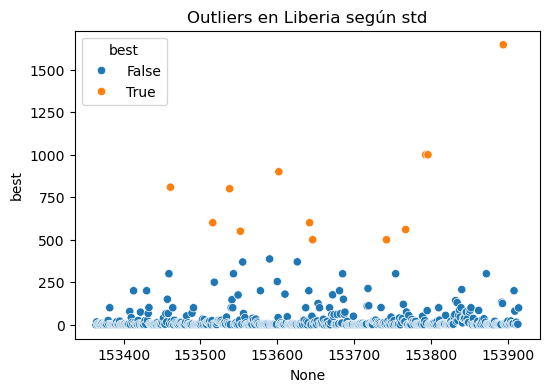

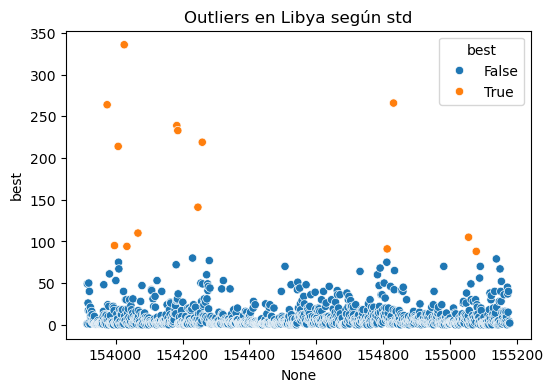

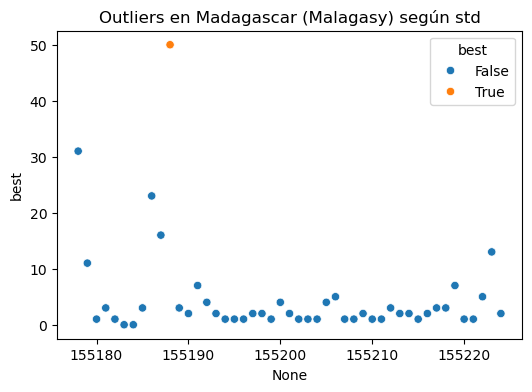

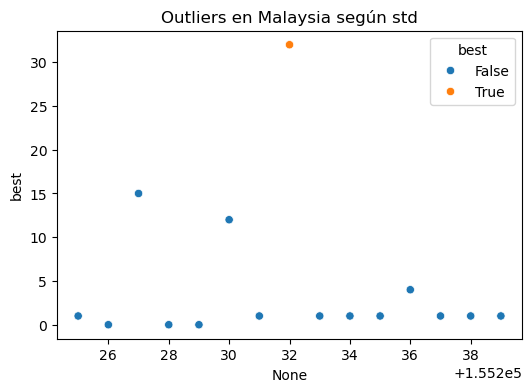

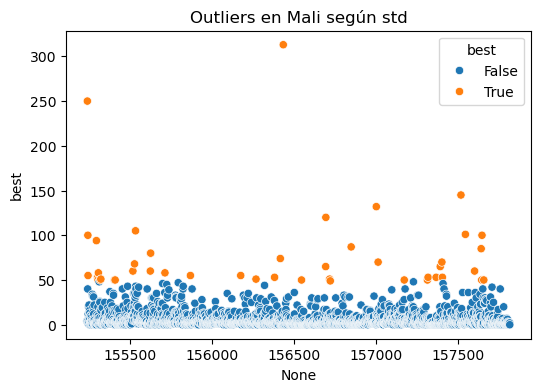

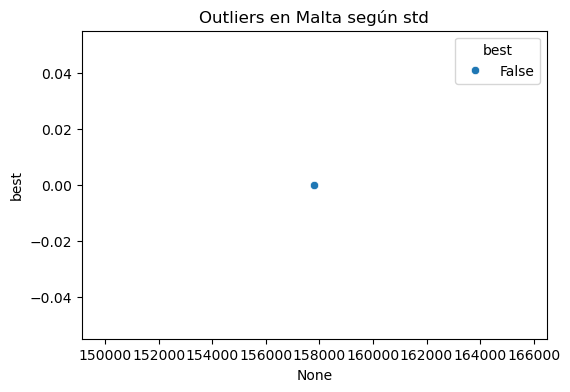

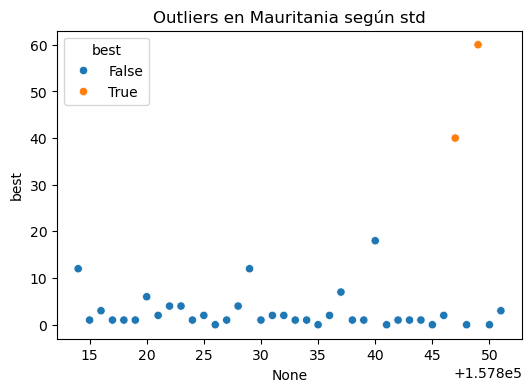

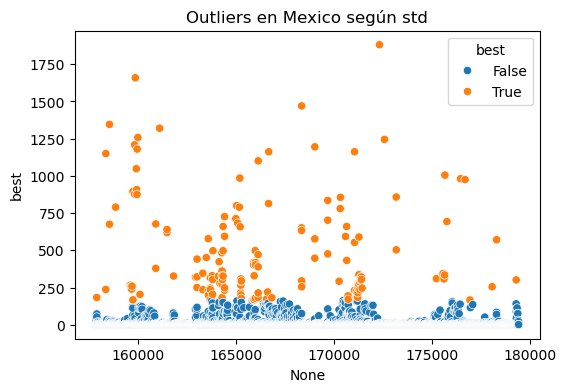

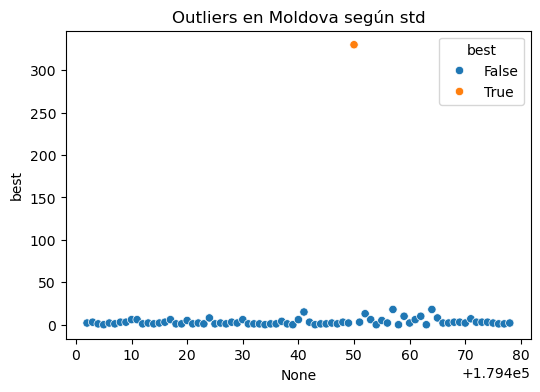

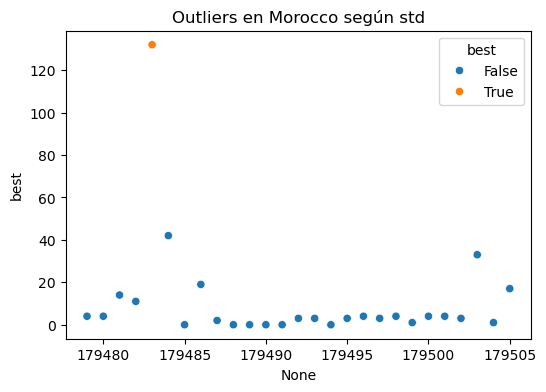

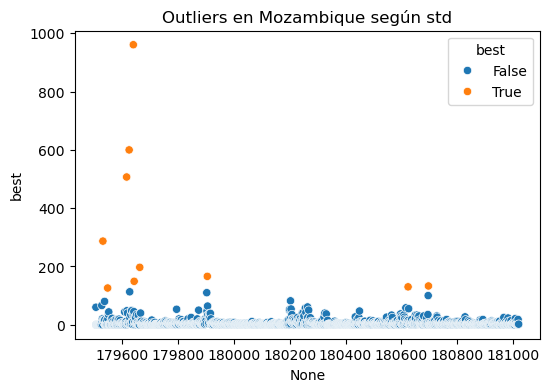

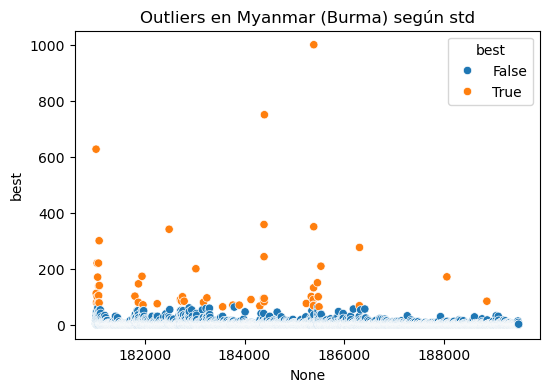

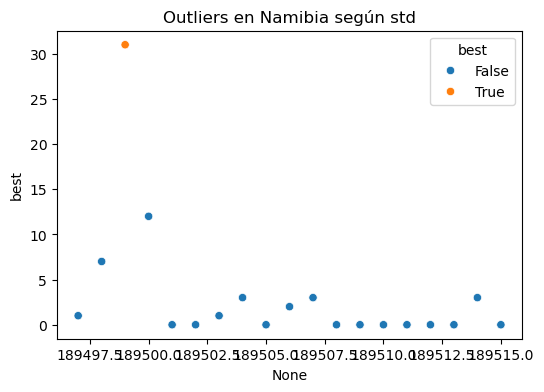

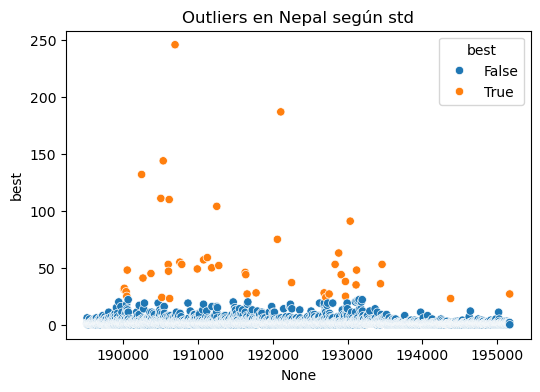

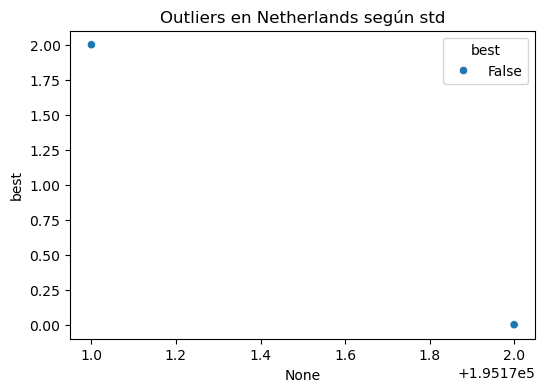

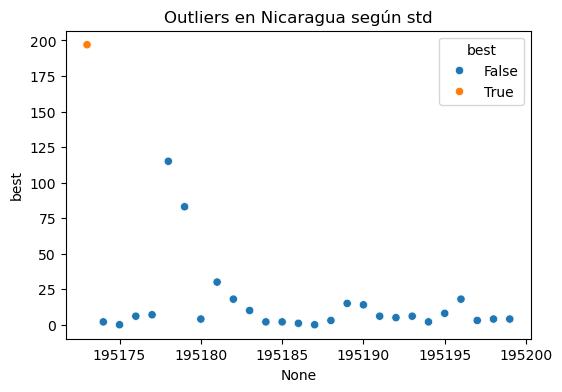

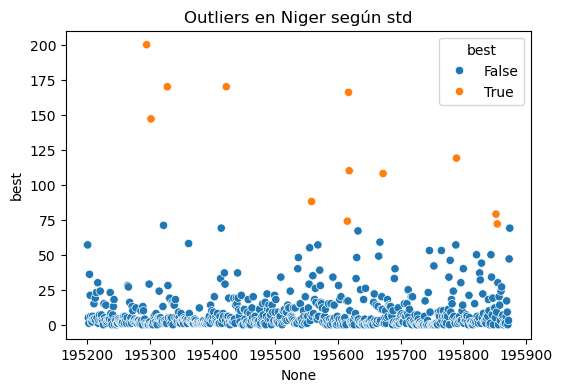

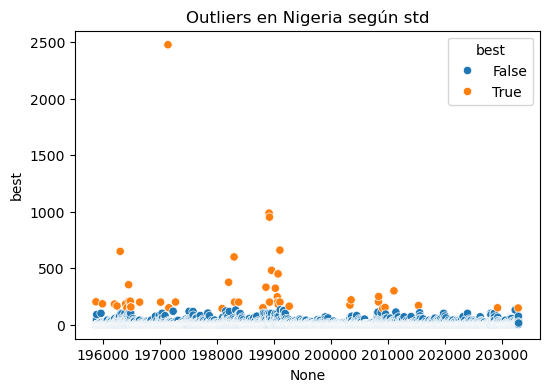

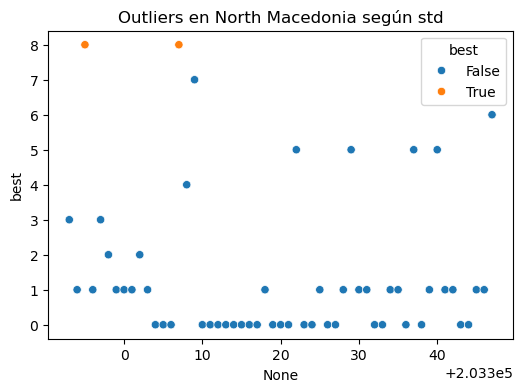

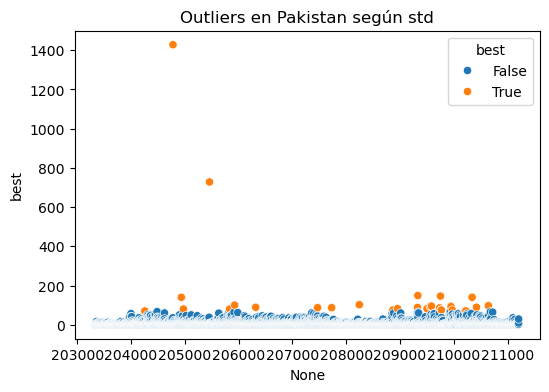

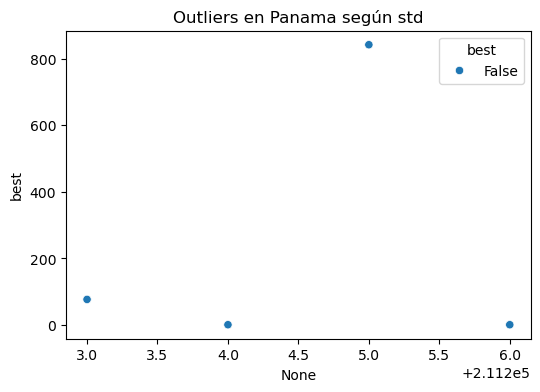

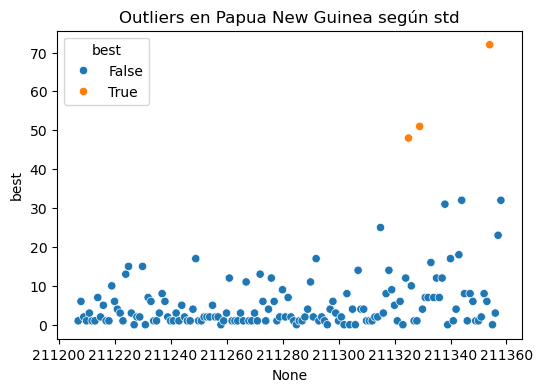

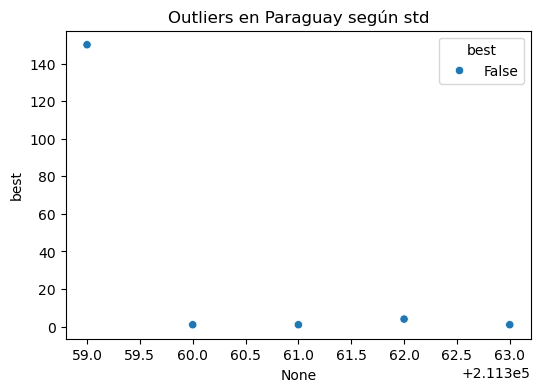

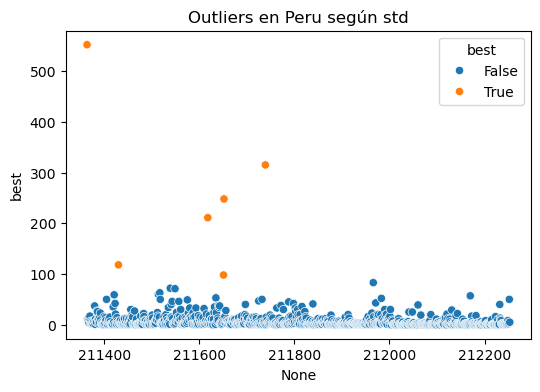

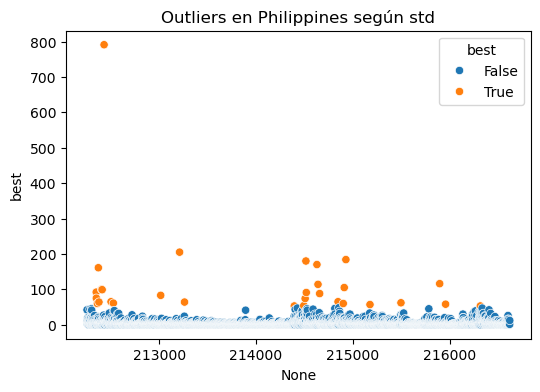

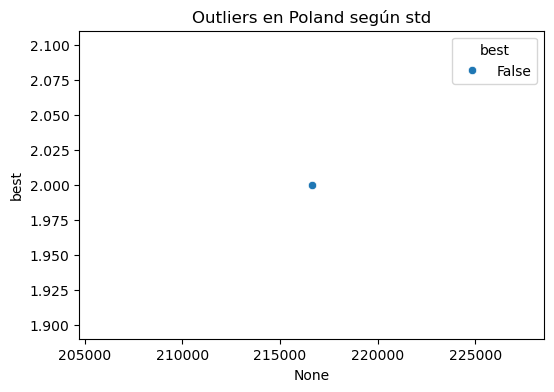

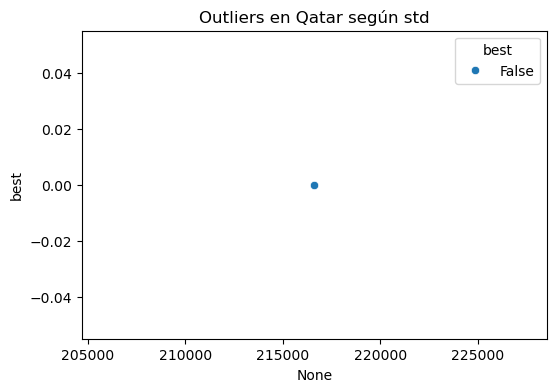

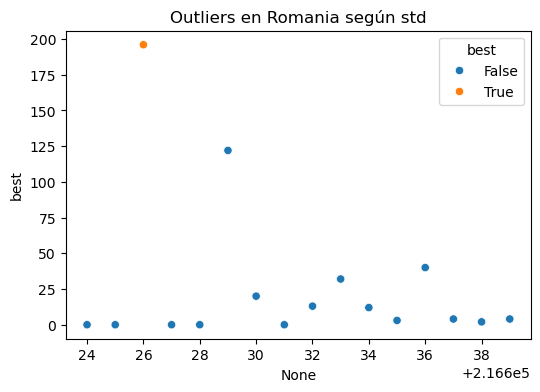

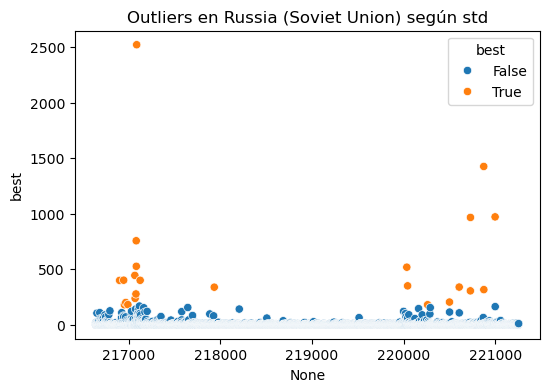

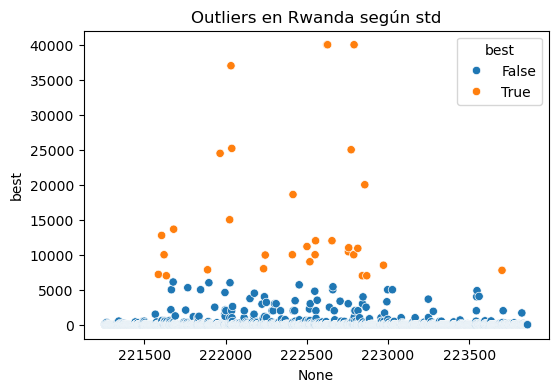

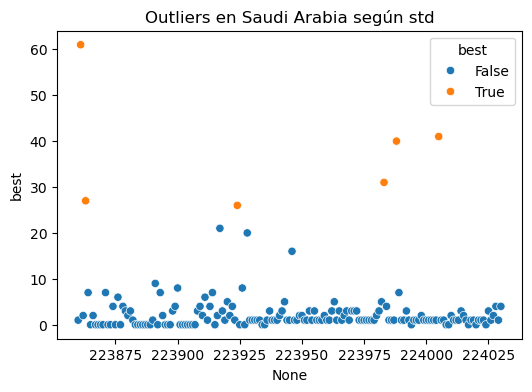

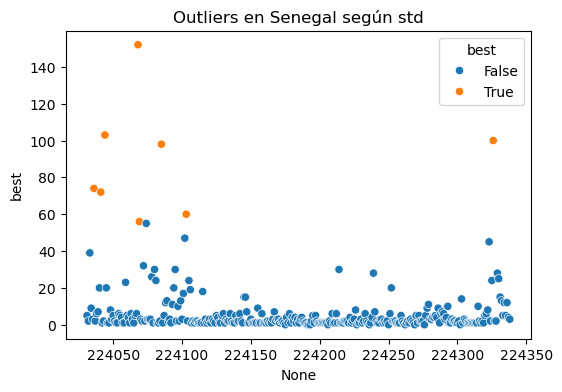

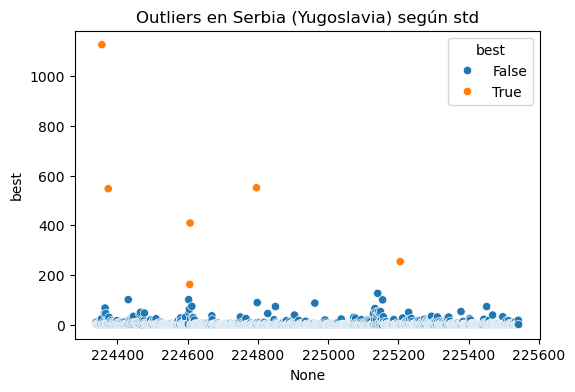

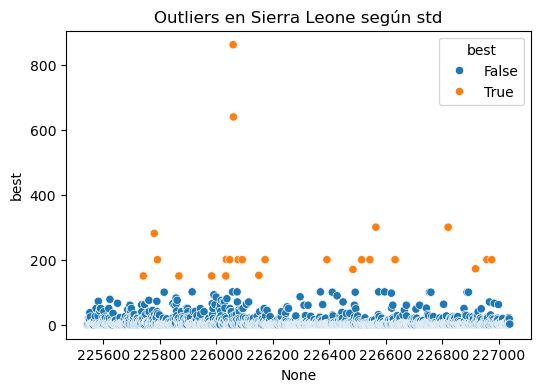

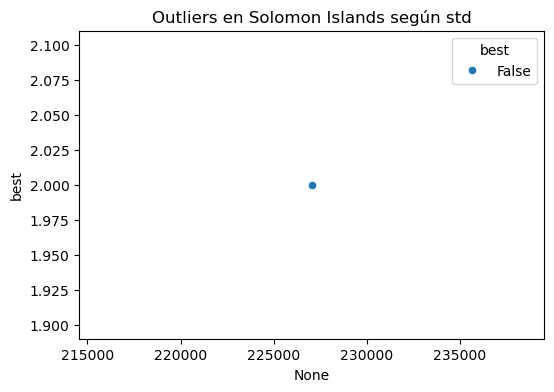

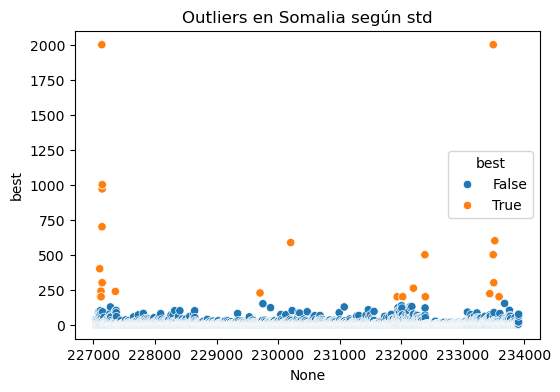

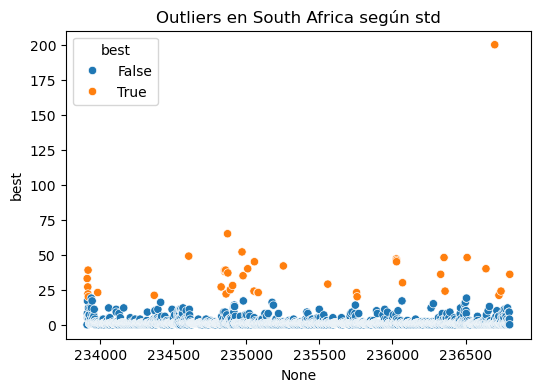

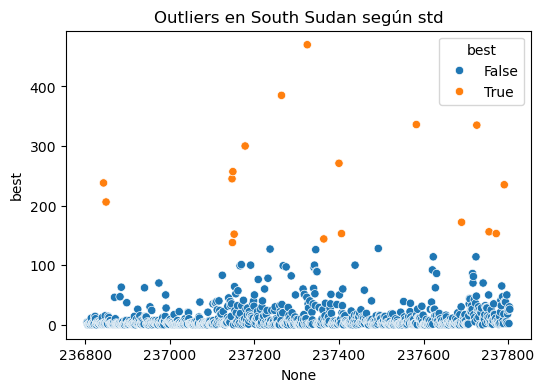

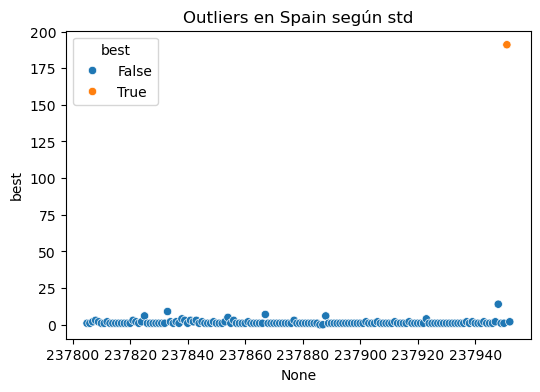

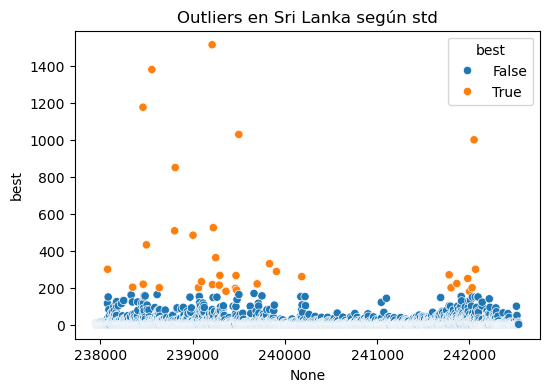

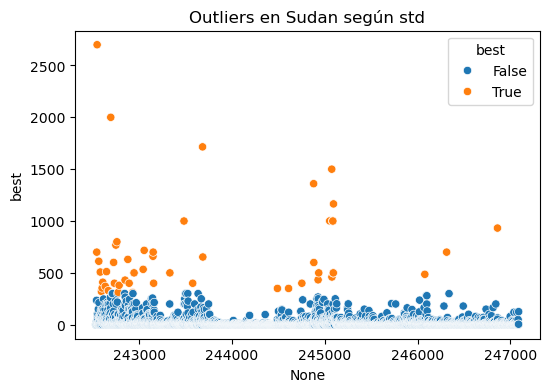

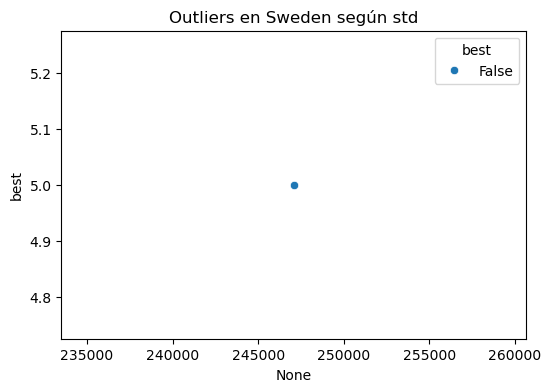

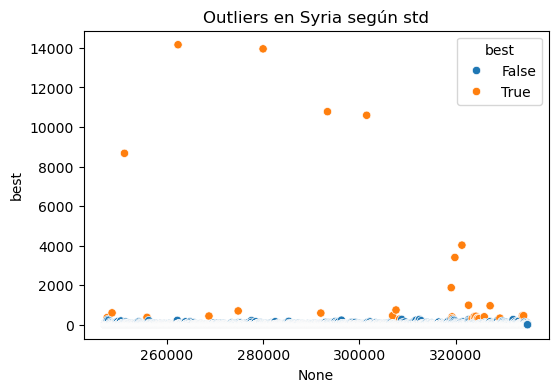

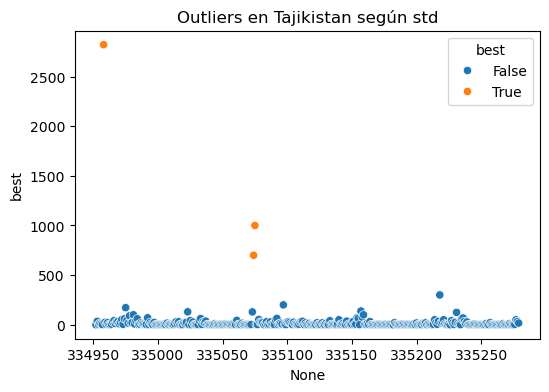

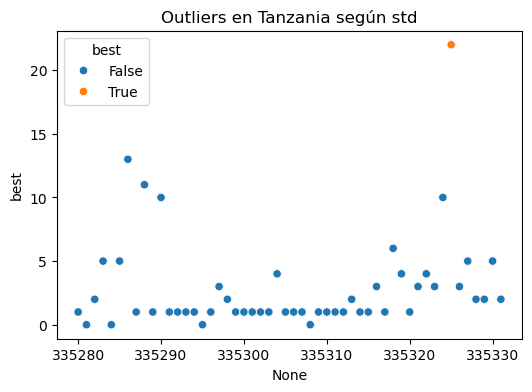

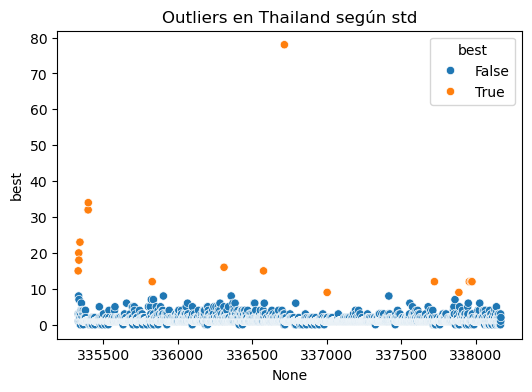

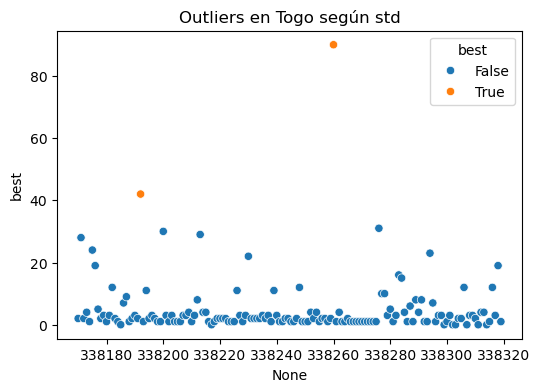

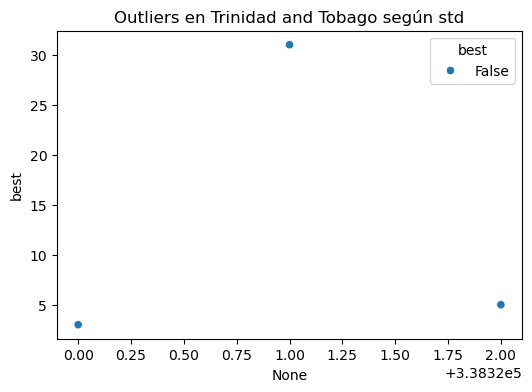

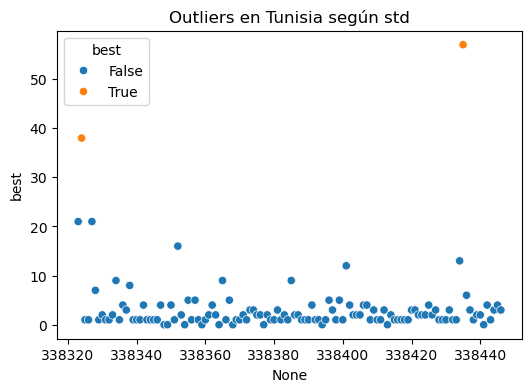

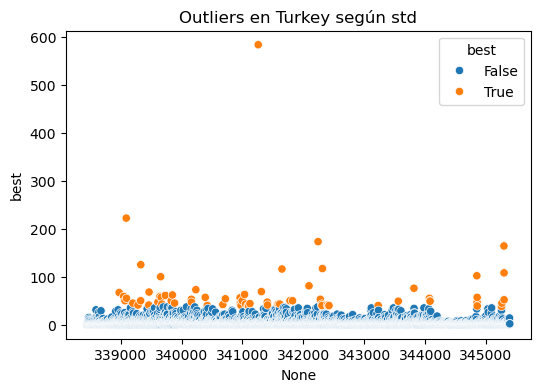

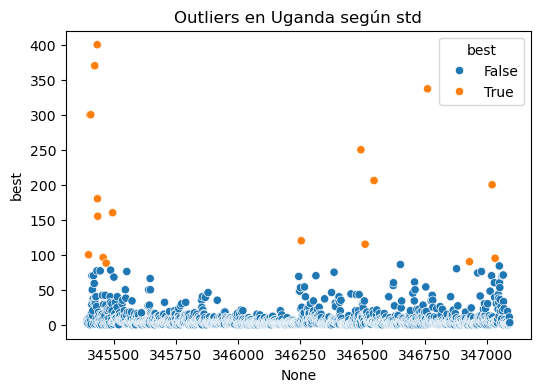

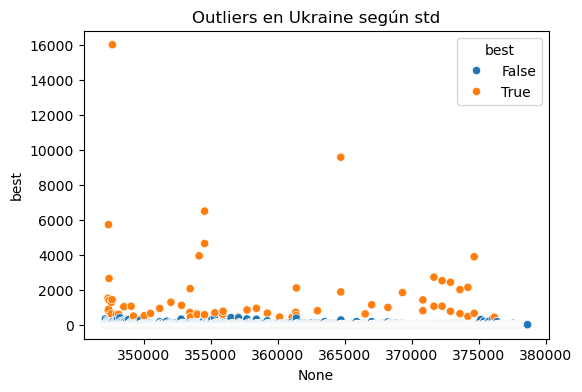

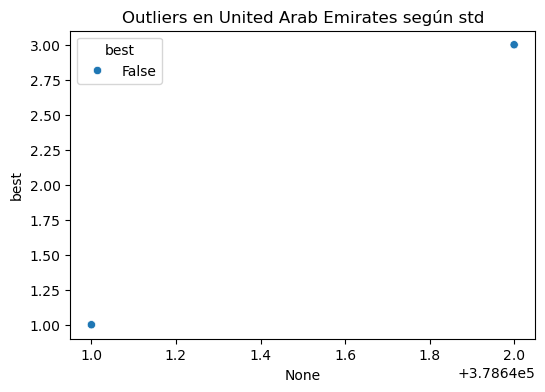

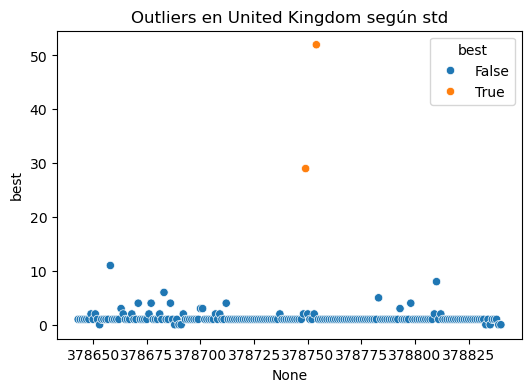

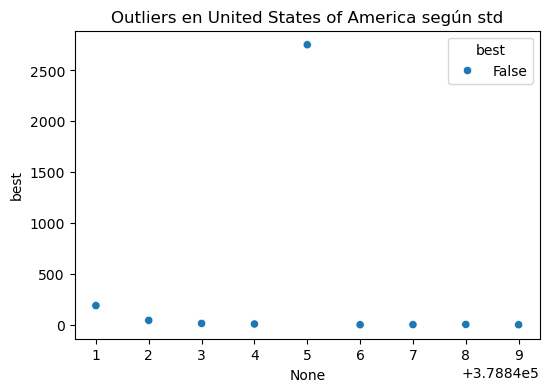

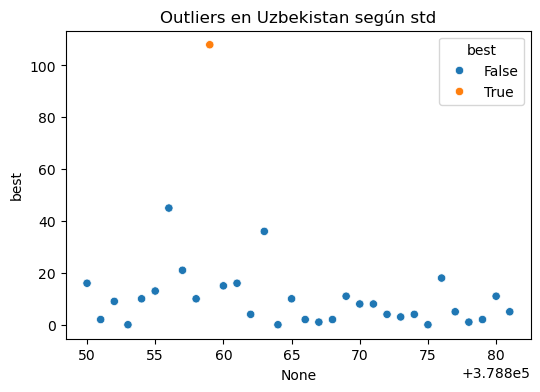

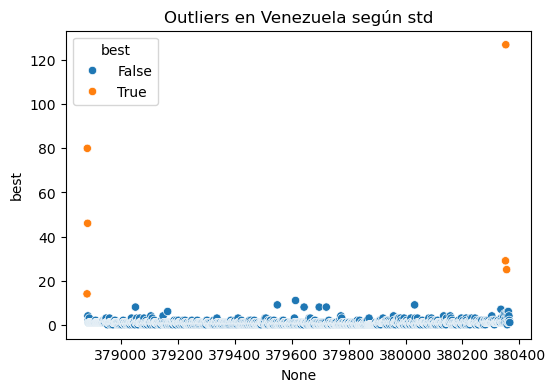

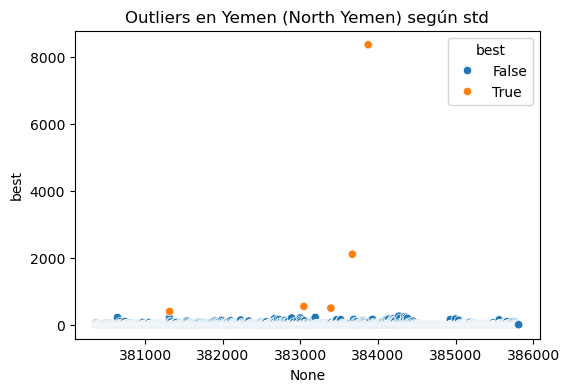

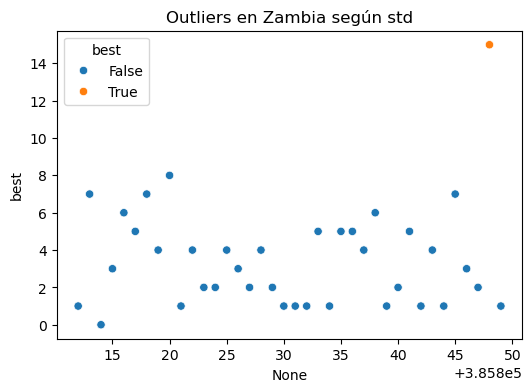

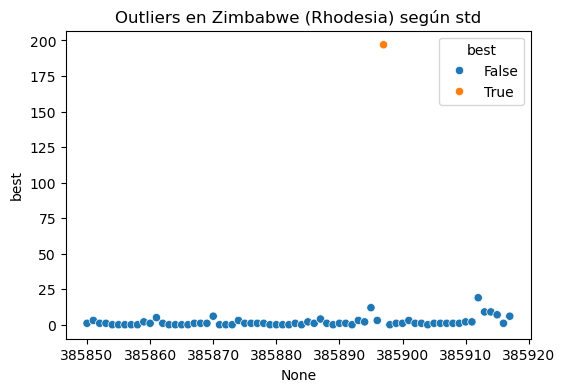

In [ ]:
# Visualización con scatterplot
for country, group in dfqt.groupby("country", observed=False):
    mean = group['best'].mean()
    std = group['best'].std()
    outliers_std = group['best'] > (mean + 3 * std)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=group, x=group.index, y='best', hue=outliers_std)
    plt.title(f"Outliers en {country} según std")
    plt.show()
